In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Wczytanie 
df = pd.read_csv("kidney_disease.csv")
df.head(5)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
df.shape

(400, 26)

In [5]:
df.drop(columns=['id'], inplace=True) #Usuwam kolumne id ponieważ nie wnosi ona żadnych istotnych informacji
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification']

In [7]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [10]:
#Szybki podgląd na typy kolumn, jak widać niektóre z nich są zapisane w postaci object
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
classification              object
dtype: object

In [11]:
#Wypisanie unikalnych wartości dla kolumn zapisanych w typie object 
def showUnique(x):
    for c in x.columns:
        if x[c].dtype == "object":
            print("Kolumna " + str(c) + ":\t" + str(df[c].unique()))
showUnique(df)

Kolumna red_blood_cells:	[nan 'normal' 'abnormal']
Kolumna pus_cell:	['normal' 'abnormal' nan]
Kolumna pus_cell_clumps:	['notpresent' 'present' nan]
Kolumna bacteria:	['notpresent' 'present' nan]
Kolumna packed_cell_volume:	['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
Kolumna white_blood_cell_count:	['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11

In [12]:
#Jak można zauważyć większość kolumn to kolumny binarne dlatego wystarczy je zamienić tak aby posiadały tylko wartości 0 lub 1
#Natomiast kolumny packed_cell_volume, white_blood_cell_count i red_blood_cell_count muszą zostąc zamienione na typ float
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce') #coerce zamienai wartosci takie jak np\t? na nan aby uniknąć problemów
df['packed_cell_volume'].dtype

dtype('float64')

In [13]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'].dtype

dtype('float64')

In [14]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['white_blood_cell_count'].dtype

dtype('float64')

In [15]:
#Kolumny do zamiany na typ float zniknęły, natomiast pozostaly jeszcze kolumny które trzeba przekonwertować do postaci binarnej
showUnique(df)

Kolumna red_blood_cells:	[nan 'normal' 'abnormal']
Kolumna pus_cell:	['normal' 'abnormal' nan]
Kolumna pus_cell_clumps:	['notpresent' 'present' nan]
Kolumna bacteria:	['notpresent' 'present' nan]
Kolumna hypertension:	['yes' 'no' nan]
Kolumna diabetes_mellitus:	['yes' 'no' ' yes' '\tno' '\tyes' nan]
Kolumna coronary_artery_disease:	['no' 'yes' '\tno' nan]
Kolumna appetite:	['good' 'poor' nan]
Kolumna peda_edema:	['no' 'yes' nan]
Kolumna aanemia:	['no' 'yes' nan]
Kolumna classification:	['ckd' 'ckd\t' 'notckd']


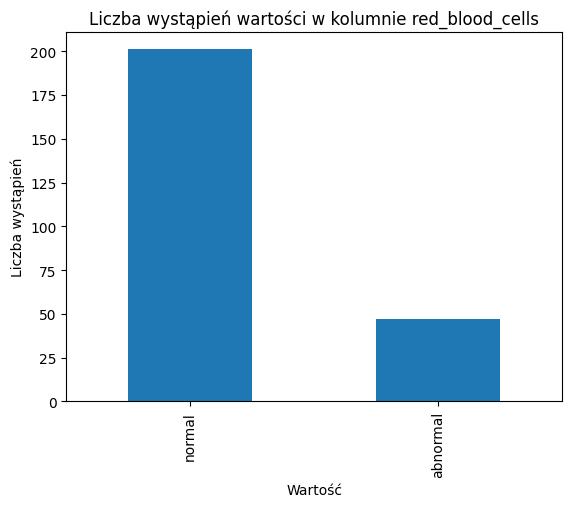

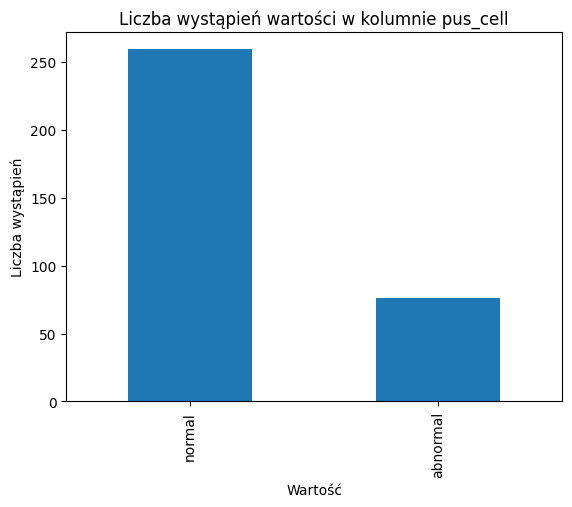

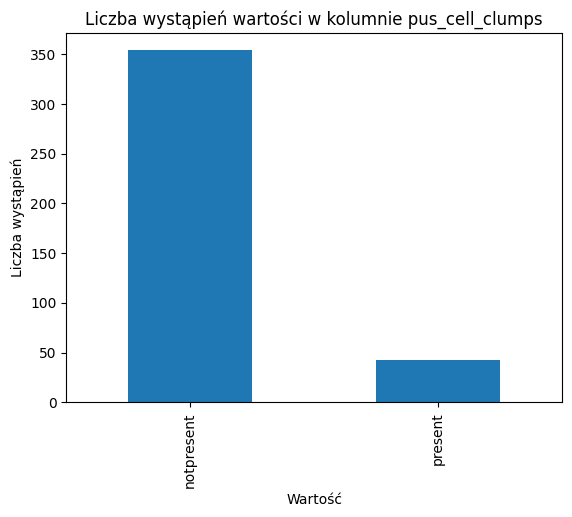

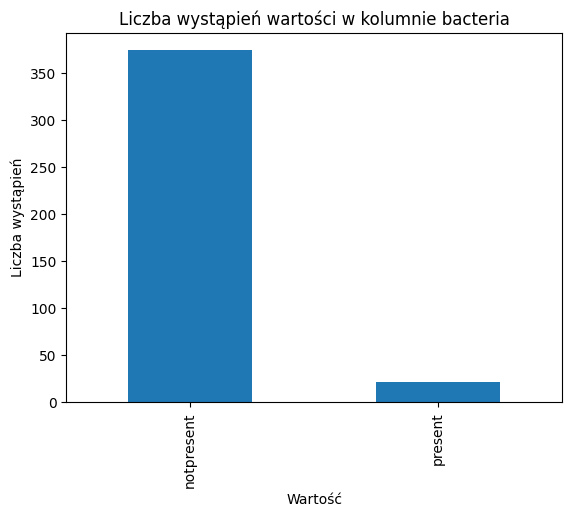

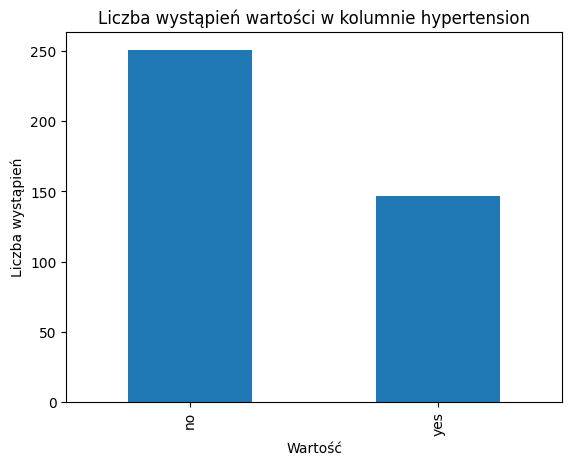

C:\Users\Daru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


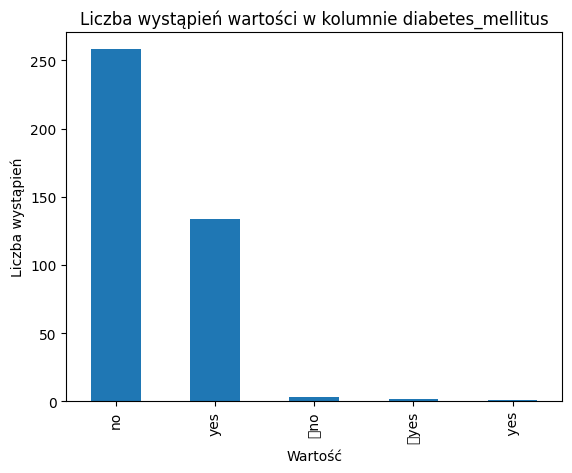

C:\Users\Daru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


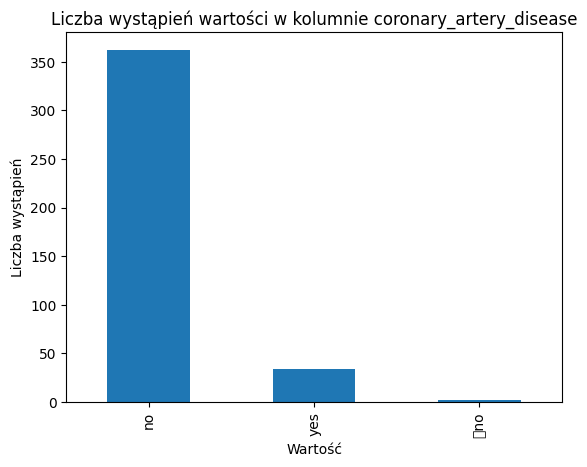

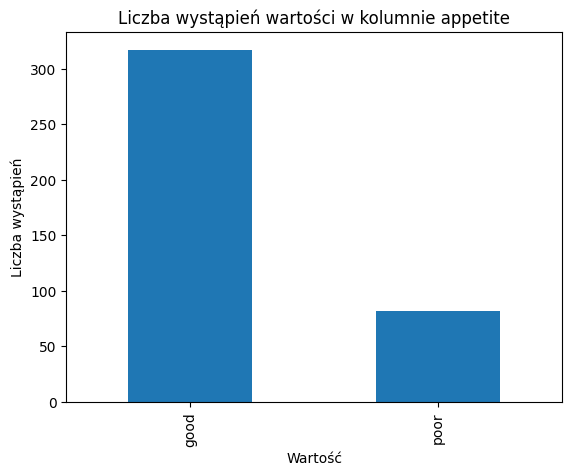

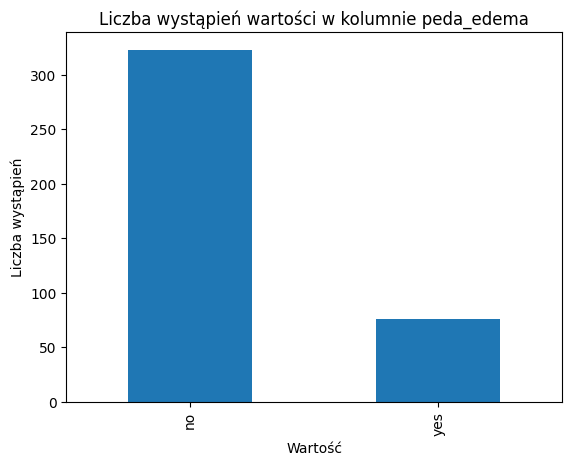

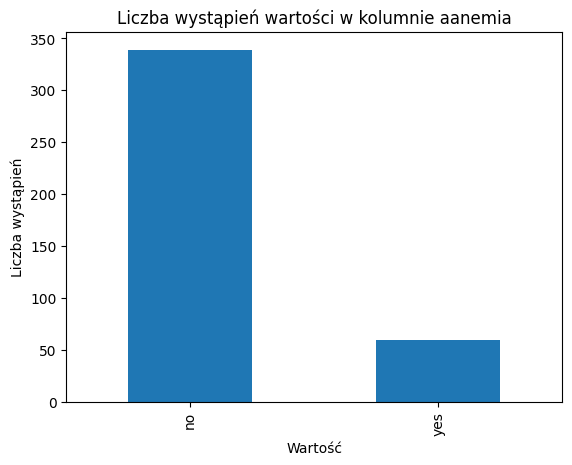

C:\Users\Daru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


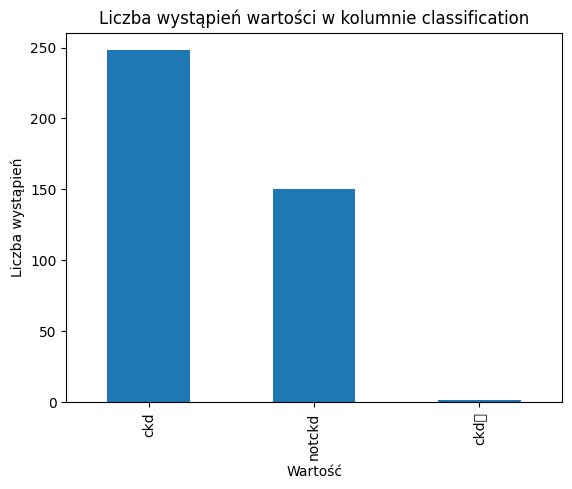

In [16]:
for c in df.columns:
    if df[c].dtype == "object":
        counts = df[c].value_counts()
        counts.plot(kind='bar')
        plt.title('Liczba wystąpień wartości w kolumnie ' + str(c))
        plt.xlabel('Wartość')
        plt.ylabel('Liczba wystąpień')
        plt.show()

In [17]:
df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
df.replace({'notpresent': 0, 'present': 1}, inplace=True)
df.replace({'no': 0, 'yes': 1,'\tno': 0, '\tyes': 1, ' yes':1}, inplace=True)
df.replace({'poor': 0, 'good': 1}, inplace=True)
df.replace({'notckd': 0, 'ckd': 1, 'ckd\t': 1}, inplace=True)

C:\Users\Daru\AppData\Local\Temp\ipykernel_15612\3625266964.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_15612\3625266964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'notpresent': 0, 'present': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_15612\3625266964.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, e

In [18]:
showUnique(df) #Funkcja nic nie zwraca to znaczy, że nie ma juz zadnych kolumn z wartościami o typie object

In [19]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells            float64
pus_cell                   float64
pus_cell_clumps            float64
bacteria                   float64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension               float64
diabetes_mellitus          float64
coronary_artery_disease    float64
appetite                   float64
peda_edema                 float64
aanemia                    float64
classification               int64
dtype: object

In [20]:
df.sample(10) #Wszystko wygląda raczej ok, natomiast nadal są wartości null

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
287  39.0            70.0             1.025      0.0    0.0              0.0   
350  65.0            70.0             1.025      0.0    0.0              NaN   
191   NaN            70.0             1.010      3.0    0.0              0.0   
326  47.0            60.0             1.020      0.0    0.0              0.0   
32   61.0            90.0             1.010      1.0    1.0              NaN   
329  33.0            60.0             1.025      0.0    0.0              0.0   
129  75.0            70.0             1.025      1.0    0.0              NaN   
340  32.0            70.0             1.025      0.0    0.0              0.0   
313  55.0            80.0             1.020      0.0    0.0              0.0   
262  55.0            80.0             1.020      0.0    0.0              0.0   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
287       0.0              0.0       0.0                 124.0  ...   
350       NaN              0.0       0.0                  85.0  ...   
191       0.0              0.0       0.0                 110.0  ...   
326       0.0              0.0       0.0                 109.0  ...   
32        0.0              0.0       0.0                 159.0  ...   
329       0.0              0.0       0.0                  80.0  ...   
129       0.0              0.0       0.0                 158.0  ...   
340       0.0              0.0       0.0                 100.0  ...   
313       0.0              0.0       0.0                 104.0  ...   
262       0.0              0.0       0.0                 118.0  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
287                43.0                     NaN                   NaN   
350                43.0                  9600.0                   4.5   
191                26.0                  9200.0                   3.4   
326                41.0                  8300.0                   5.2   
32                 34.0                  9600.0                   4.0   
329                48.0                  7800.0                   5.1   
129                 NaN                     NaN                   NaN   
340                43.0                  6700.0                   5.9   
313                52.0                  8200.0                   4.8   
262                43.0                  7200.0                   5.4   

     hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
287           0.0                0.0                      0.0       1.0   
350           0.0                0.0                      0.0       1.0   
191           1.0                1.0                      0.0       0.0   
326           0.0                0.0                      0.0       1.0   
32            1.0                1.0                      0.0       0.0   
329           0.0                0.0                      0.0       1.0   
129           1.0                0.0                      0.0       0.0   
340           0.0                0.0                      0.0       1.0   
313           0.0                0.0                      0.0       1.0   
262           0.0                0.0                      0.0       1.0   

     peda_edema  aanemia  classification  
287         0.0      0.0               0  
350         0.0      0.0               0  
191         0.0      0.0               1  
326         0.0      0.0               0  
32          0.0      0.0               1  
329         0.0      0.0               0  
129         1.0      0.0               1  
340         0.0      0.0               0  
313         0.0      0.0               0  
262         0.0      0.0               0  

[10 rows x 25 columns]

In [21]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [22]:
#Funkcja zamienia NaN na srednia w danej kolumnie tylko gdy nie jest to kolumna zawierająca wartości binarne
def changeNanToAvg(df):
    for column in df.columns:
        if df[column].dtype != 'object':  
            if not all(value in (0, 1) for value in df[column].dropna()):  # Sprawdzanie, czy wartości nie są tylko 0 lub 1
                mean_value = df[column].mean()  # Średnia dla kolumny
                df[column] = df[column].fillna(mean_value)
changeNanToAvg(df)

In [23]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
aanemia                      1
peda_edema                   1
appetite                     1
age                          0
packed_cell_volume           0
red_blood_cell_count         0
white_blood_cell_count       0
sodium                       0
haemoglobin                  0
potassium                    0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
sugar                        0
albumin                      0
specific_gravity             0
classification               0
dtype: int64

In [24]:
df['red_blood_cells'].value_counts()

red_blood_cells
0.0    201
1.0     47
Name: count, dtype: int64

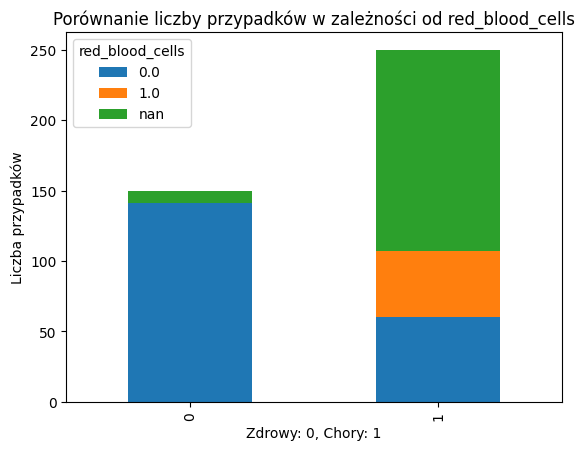

In [25]:
#Poniewaz ciezko cokolwiek z tego wywnioskować lepiej będzie usunąć tą kolumne
ct = pd.crosstab(df['classification'], df['red_blood_cells'], dropna=False) 
ct.plot(kind='bar', stacked=True)
plt.title('Porównanie liczby przypadków w zależności od red_blood_cells')
plt.xlabel('Zdrowy: 0, Chory: 1')
plt.ylabel('Liczba przypadków')
plt.show()

In [26]:
df.drop(columns=['red_blood_cells'], inplace=True)

In [27]:
#Poniewaz reszta kolumn ma małą ilość wartości Null usuwam wiersze gdzie znajdja sie te wartosci (z 400 wierszy usunięte zostaje około 70)
df = df.dropna()
df['classification'].value_counts()

classification
1    194
0    135
Name: count, dtype: int64

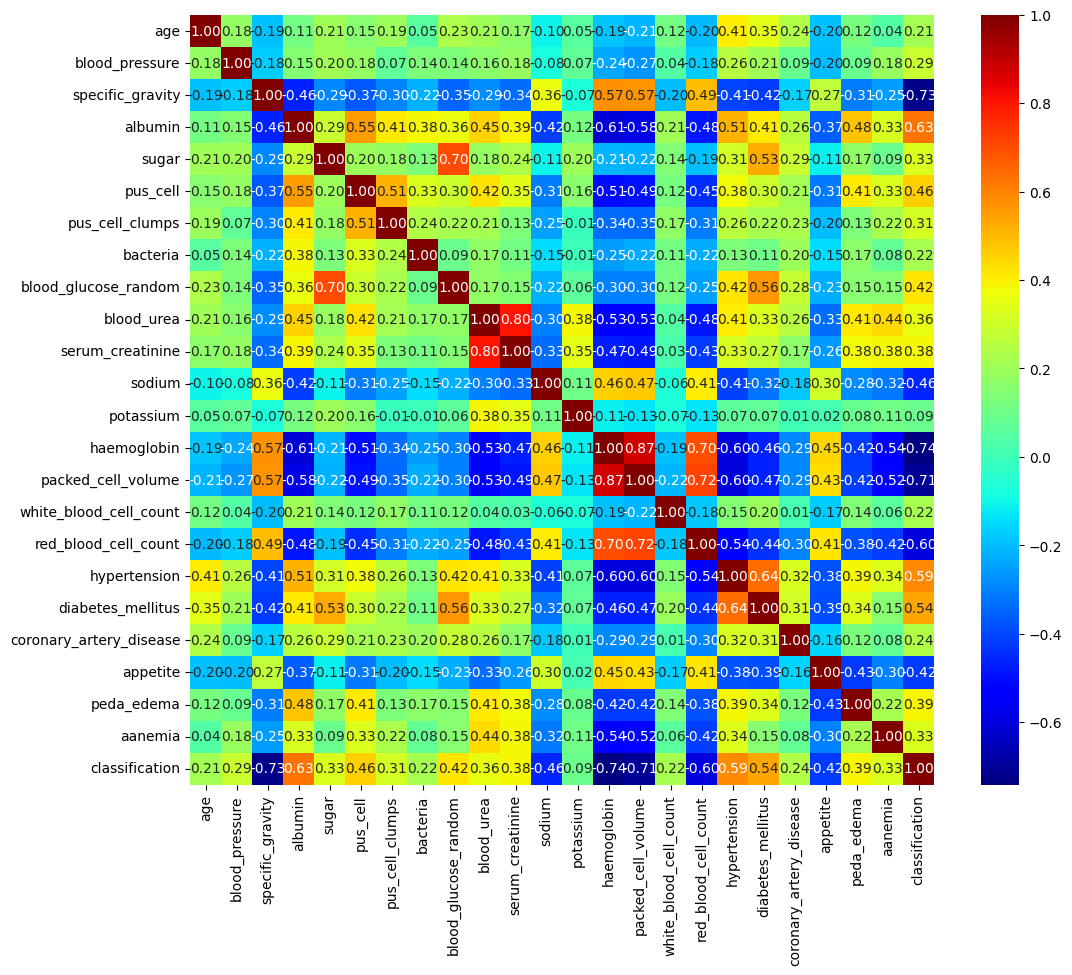

In [28]:
#Korelacje
df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="jet",fmt='.2f')
plt.show()

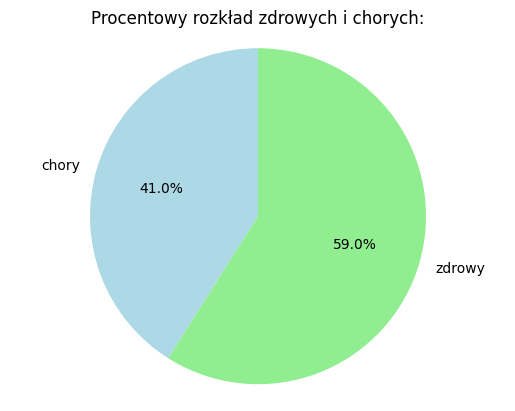

In [29]:
#Wykres stosunku chorych i zdrowych
ill = (df['classification'] == 0).sum()
healthy = (df['classification'] == 1).sum()
ill_percentage = (ill / len(df['classification'])) * 100
healthy_percentage = (healthy / len(df['classification'])) * 100
values = [ill, healthy]
plt.pie(values, labels=['chory', 'zdrowy'], colors=['lightblue', 'lightgreen'], autopct='%1.1f%%', startangle=90)
plt.title('Procentowy rozkład zdrowych i chorych:')
plt.axis('equal') 
plt.show()

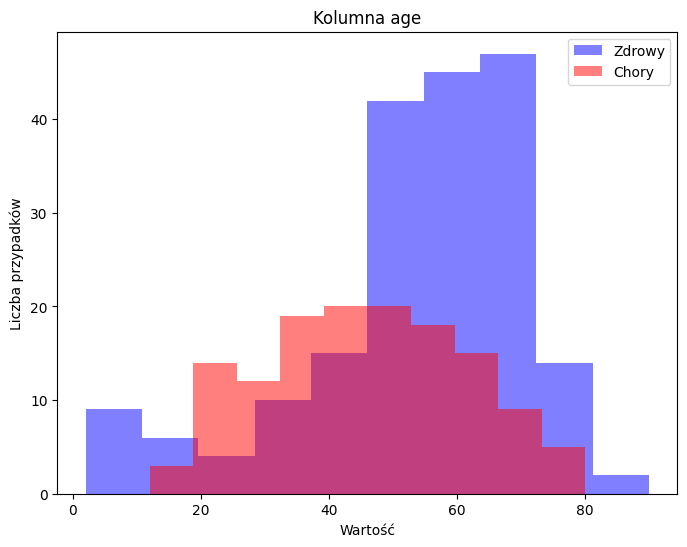

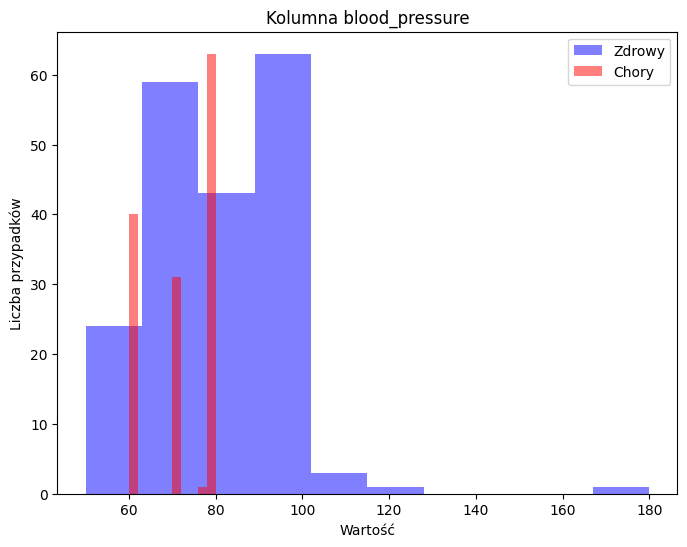

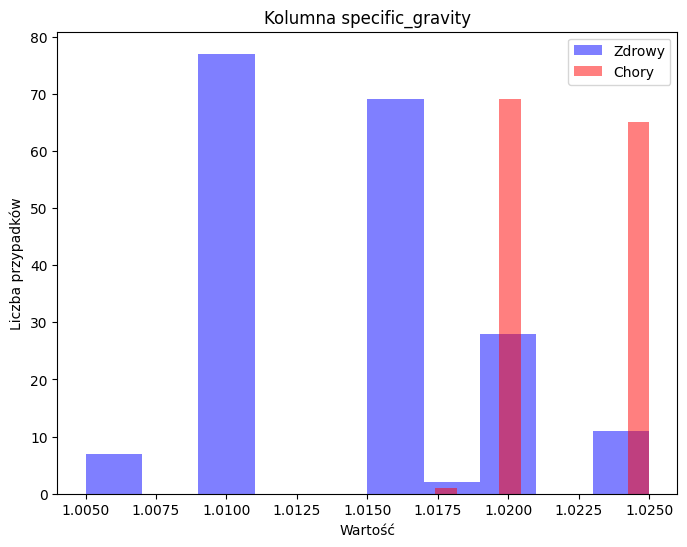

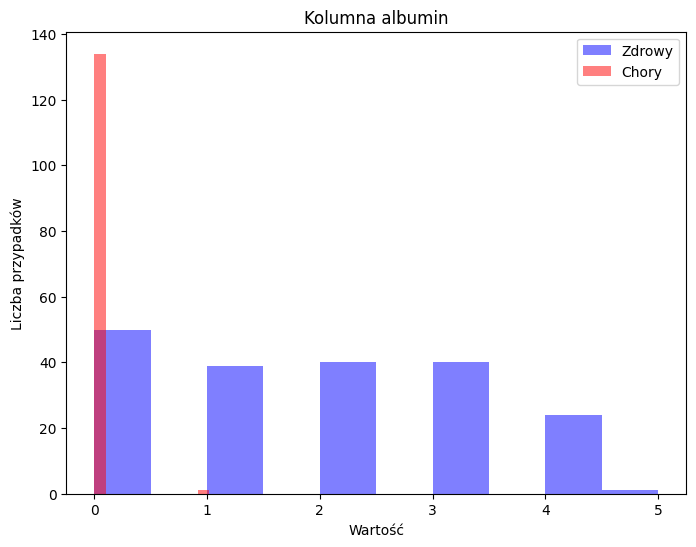

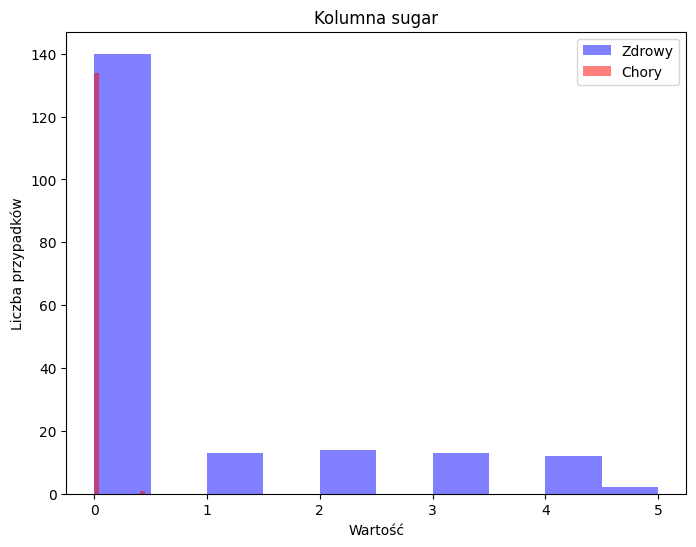

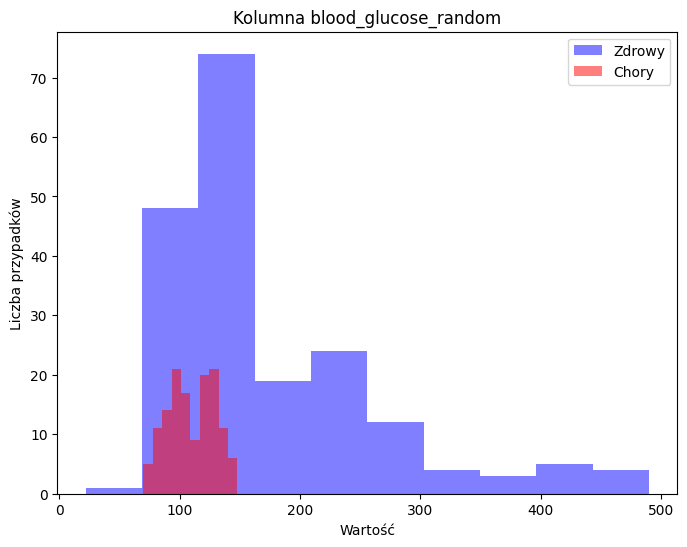

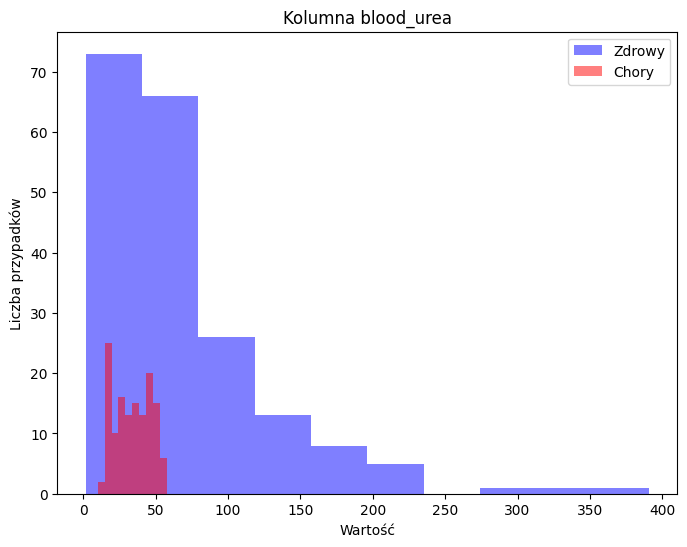

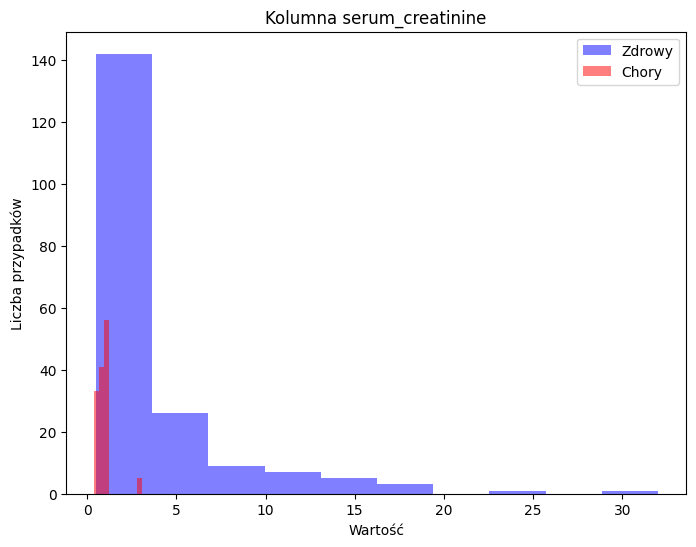

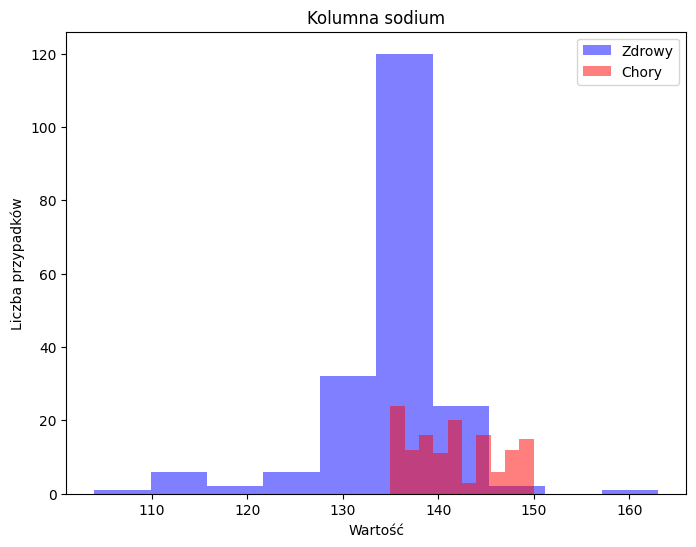

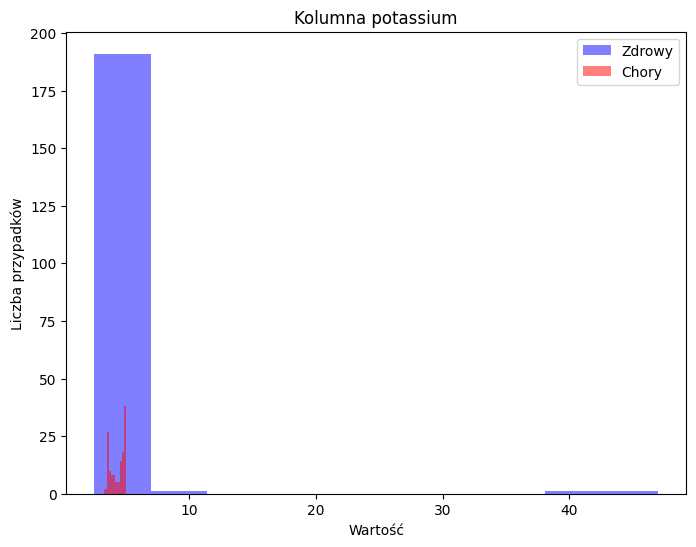

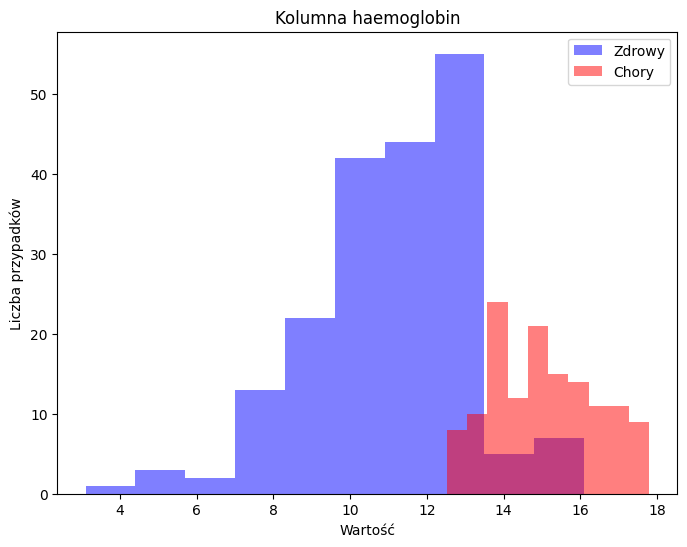

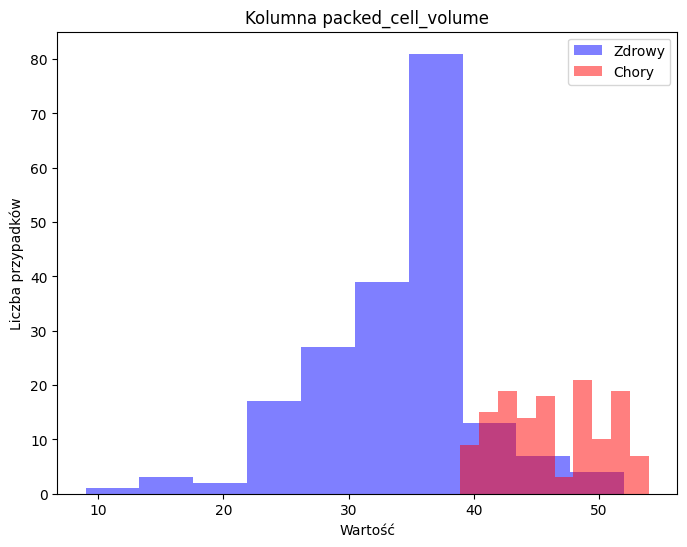

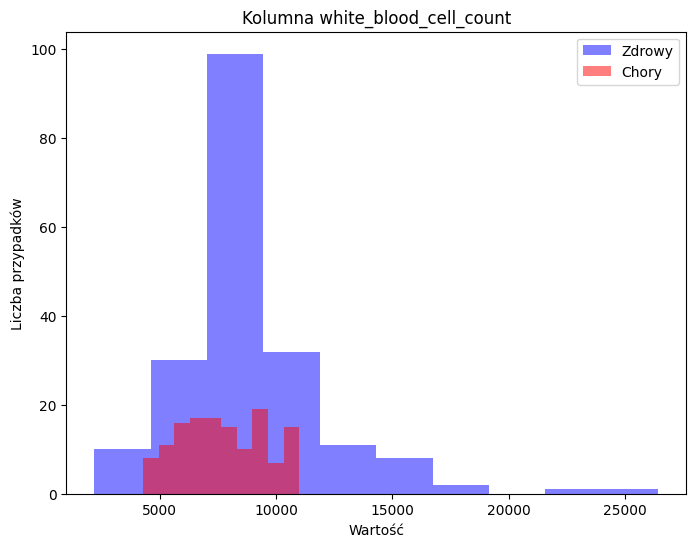

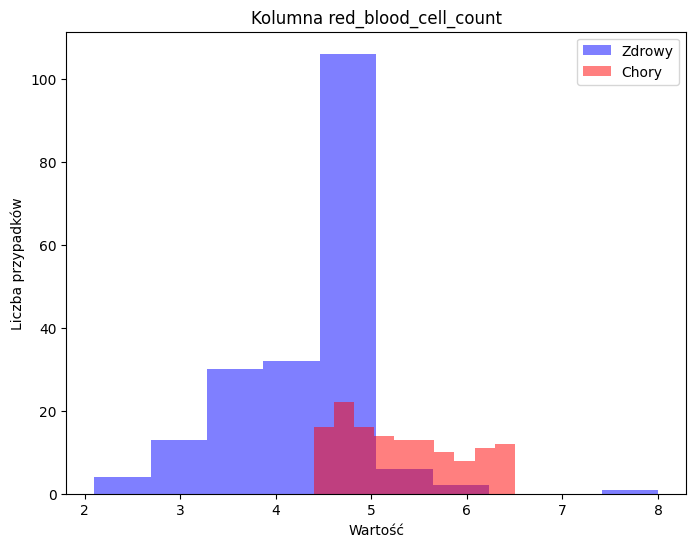

In [30]:
#wykresy histograficzne
for column in df.columns[:-1]:
    unique_values = df[column].unique()
    if len(unique_values) != 2 or set(unique_values) != {0, 1}:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column][df['classification'] == 1], color='blue', alpha=0.5, label='Zdrowy')
        plt.hist(df[column][df['classification'] == 0], color='red', alpha=0.5, label='Chory')
        plt.title(f'Kolumna {column}')
        plt.xlabel('Wartość')
        plt.ylabel('Liczba przypadków')
        plt.legend()
        plt.show()

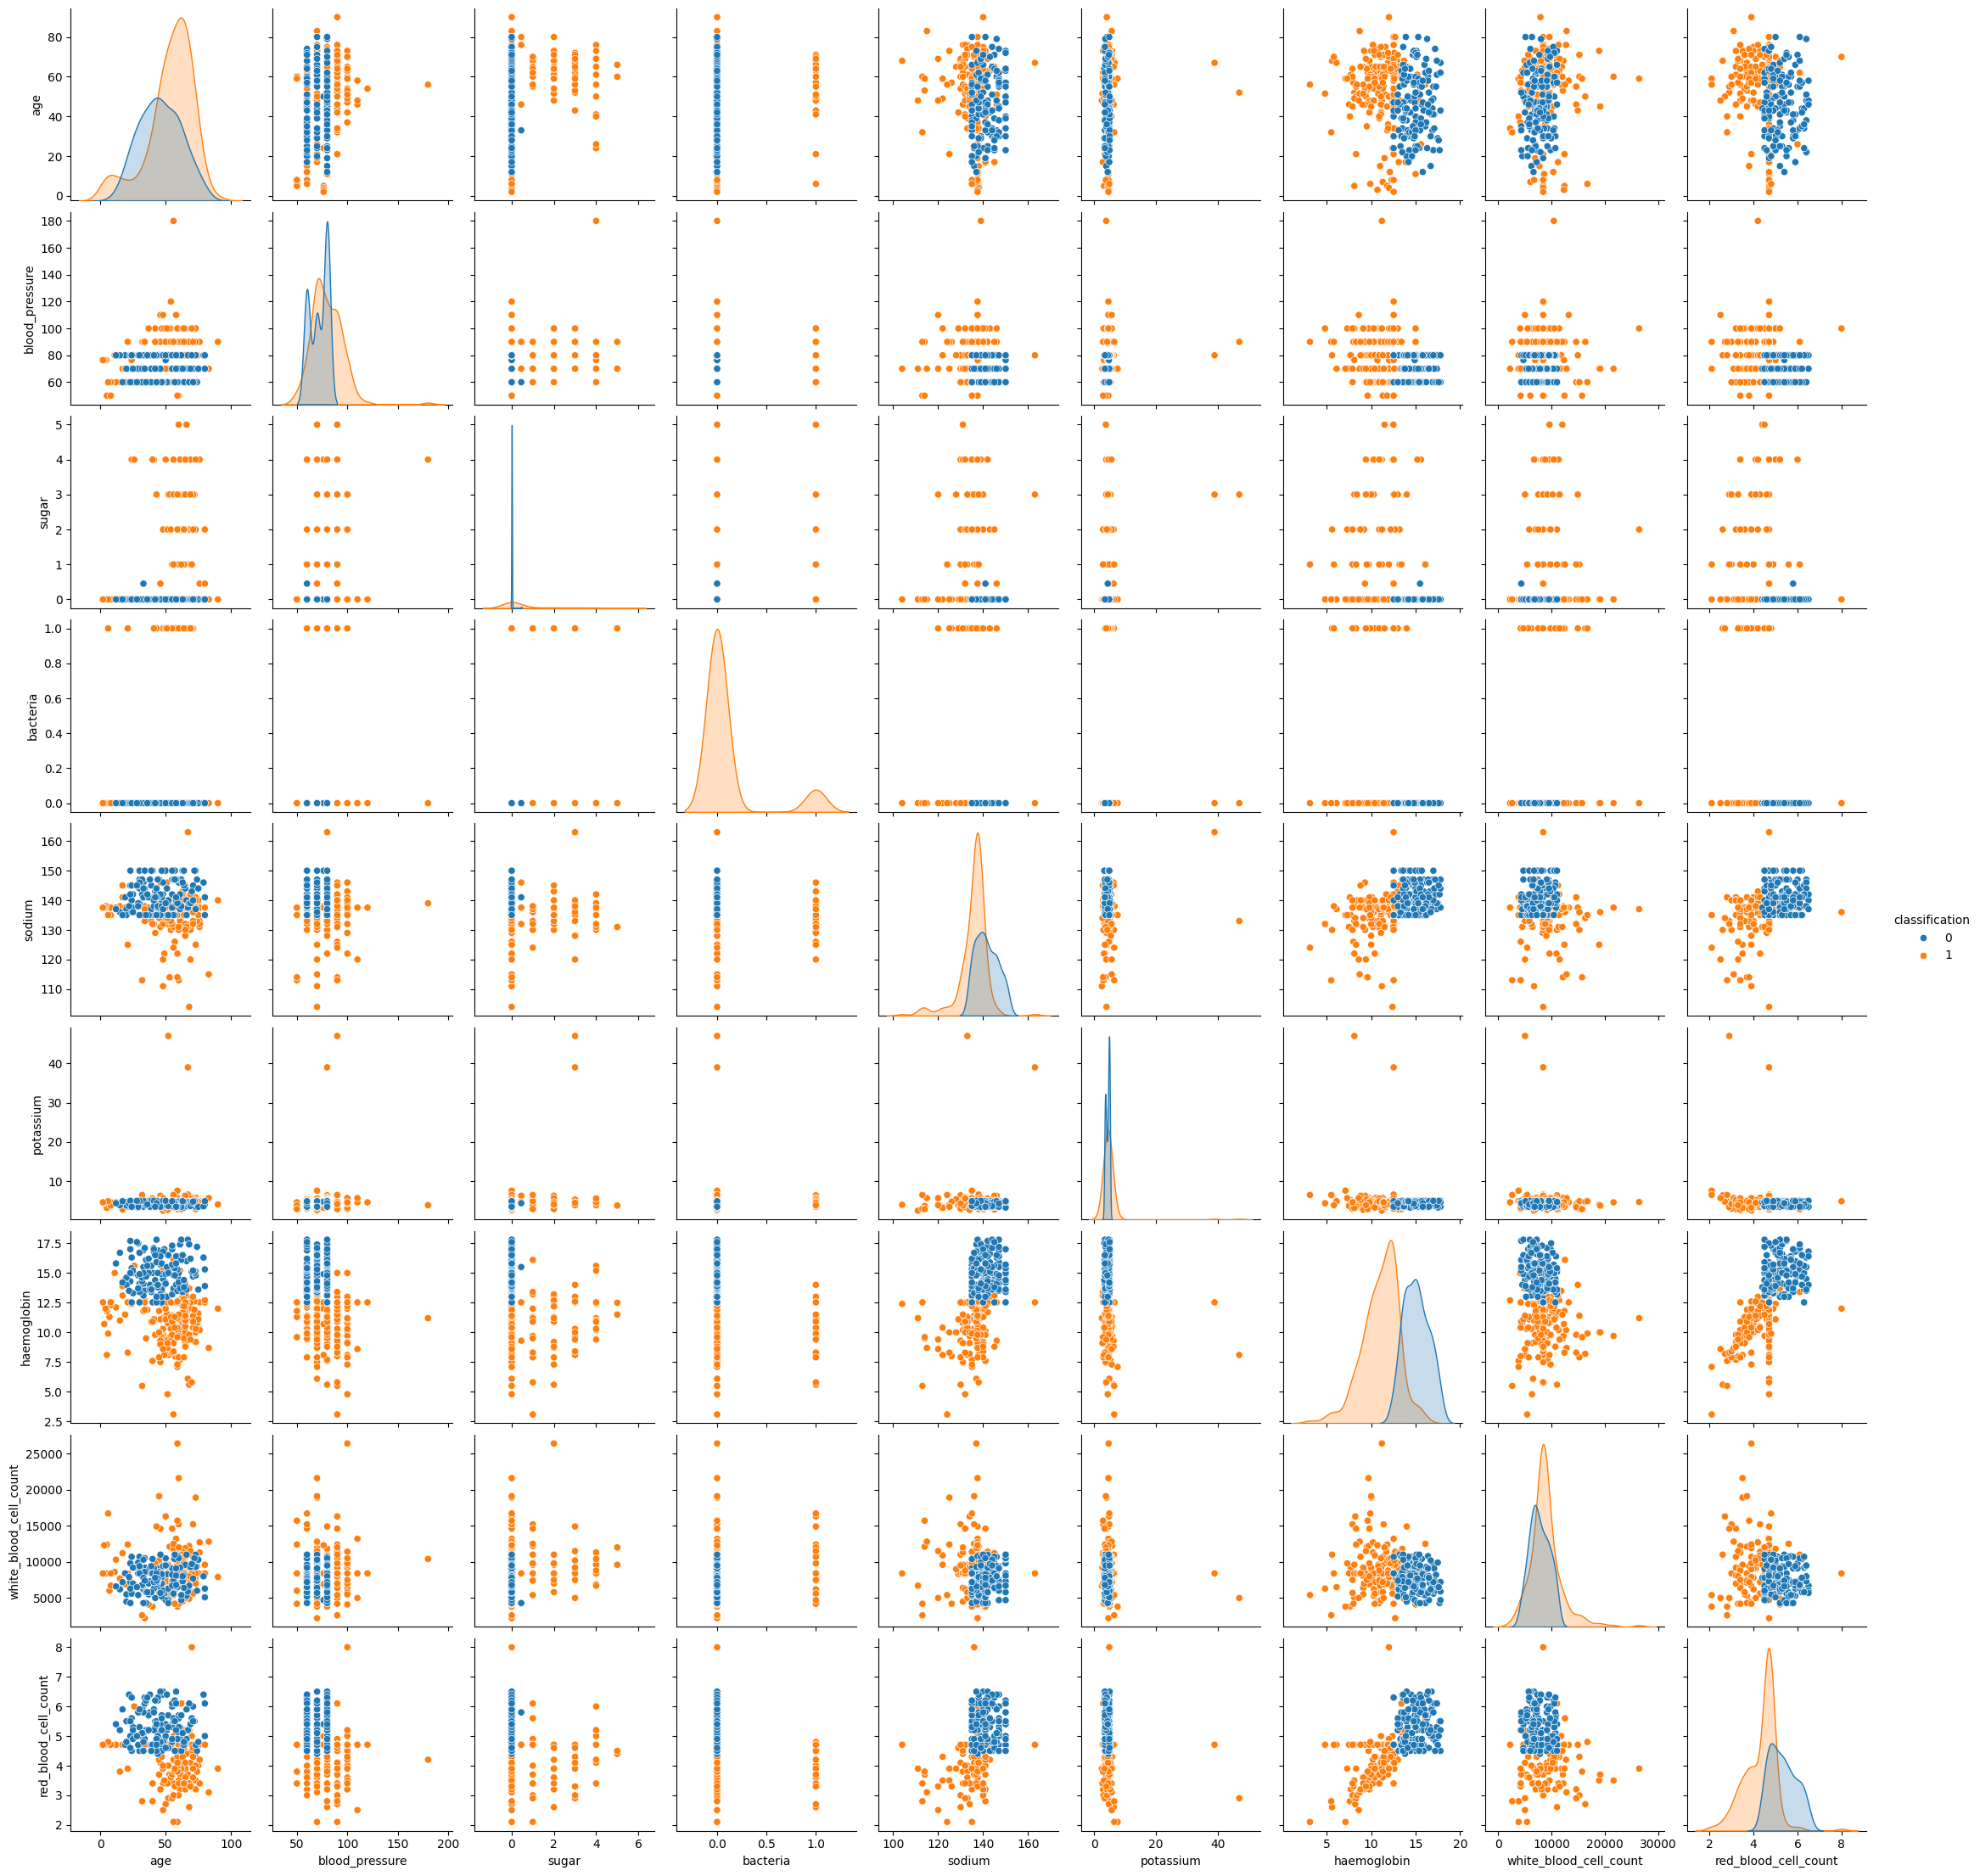

In [31]:
sns.pairplot(df, hue="classification", vars=['age', 'blood_pressure', 'sugar', 'bacteria', 'sodium',
              'potassium', 'haemoglobin', 'white_blood_cell_count', 'red_blood_cell_count'])

In [32]:
#Podstawowe funkcje do tasowania zbiorów, normalizacji i standaryzacji, a także rysowania macierzy pomyłek
import random
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

class DataProc:
    def Shuffle(x):
        for i in range(len(x)):
            j = random.randint(0,len(x)-1)
            x.iloc[i], x.iloc[j] = x.iloc[j], x.iloc[i]
    def NormalizeMinMax(x): #Normalizacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            x_copy[c] = (x_copy[c] - x_copy[c].min()) / (x_copy[c].max() - x_copy[c].min())
        return x_copy
    def StandardizeZScore(x): #Standaryzacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            mean = x_copy[c].mean()
            std = x_copy[c].std()
            x_copy[c] = (x_copy[c] - mean) / std
        return x_copy

In [33]:
#moze sie jeszcze przydac
#for k in range(1, 6):
#    if weight == False:
#        knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric)
#    else:
#        knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
#    knn_lib.fit(X_train, y_train)
#    y_pred = knn_lib.predict(X_test)
#    res = knn_lib.score(X_test, y_test)
#    print("Dla k =", k, "dokładność wynosi:", res)

In [55]:
#Głowna funkcja do obslugi KNN z roznymi metrykami i cross_val, cv mozna potem zmienic na wieksze 
def evaluate_knn_with_metric(X, y, metric="euclidean", weight=False, cv=10):
    best_k = None
    best_accuracy = 0.0
    best_confusion_matrix = None
    scores = []
    k_values = [i for i in range(1,31)]
    for k in k_values:
        if weight == False:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric)
        else:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        cv_score = cross_val_score(knn_lib, X, y, cv=cv)
        avg_score = np.mean(cv_score)
        scores.append(avg_score)
        if avg_score > best_accuracy:
            best_accuracy = avg_score
            best_k = k
            best_confusion_matrix = confusion_matrix(y, cross_val_predict(knn_lib, X, y, cv=cv))
    #Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(1, 31), y=scores, marker='o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Score vs. K Values ({} metric)".format(metric))
    plt.show()
    print("Dla metryki: " + metric + " najlepsze K to: " + str(best_k) + " dokladnosc wynosi dla niego: " + str(best_accuracy))
    return [metric, best_k, best_accuracy, best_confusion_matrix]
def split(df):
    df_copy = df.copy()
    #DataProc.Shuffle(df_copy)
    y = df_copy.pop('classification')
    X = df_copy
    return X, y
def plot_accuracy(scores):
    metrics = [item[0] + " k=" +  str(item[1]) for item in scores]
    accuracies = [item[2] for item in scores]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, accuracies, color='skyblue')
    plt.xlabel('Metryka wraz z najlepszym K')
    plt.ylabel('Dokładność')
    plt.title('Dokładność dla różnych metryk i najlepszych dla nich wartości K')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    #Najlepsze opcje dla kazdego bedzie kolorowal na pomaranczowo
    best_accuracy = max(accuracies)
    for i, bar in enumerate(bars):
        if accuracies[i] == best_accuracy:
            bar.set_color('orange')
    plt.show()

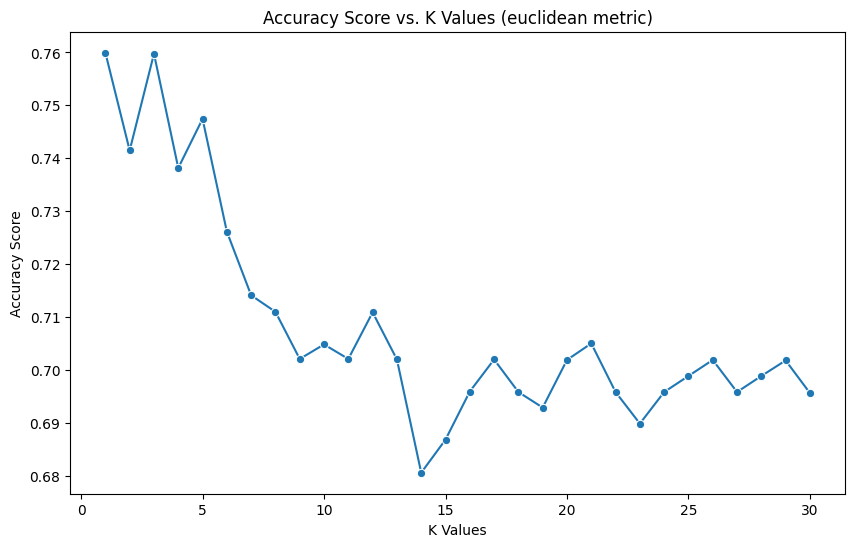

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.7599431818181819


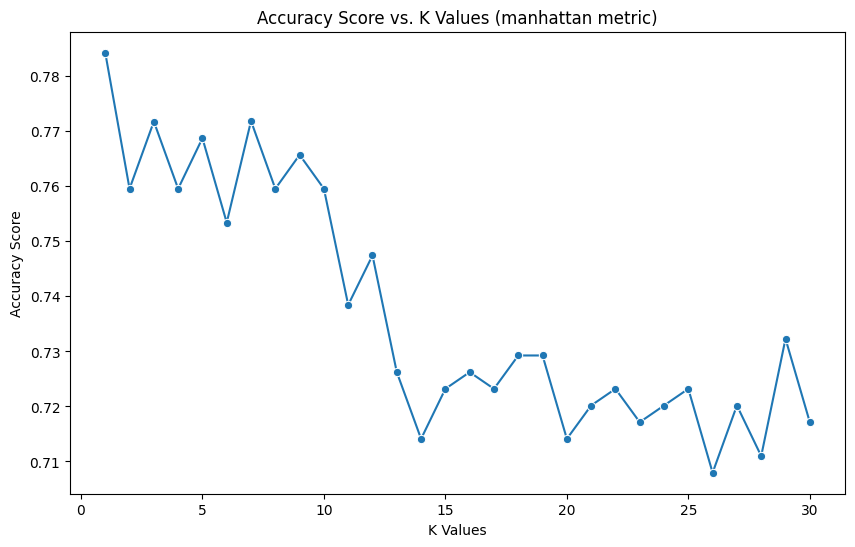

Dla metryki: manhattan najlepsze K to: 1 dokladnosc wynosi dla niego: 0.784280303030303


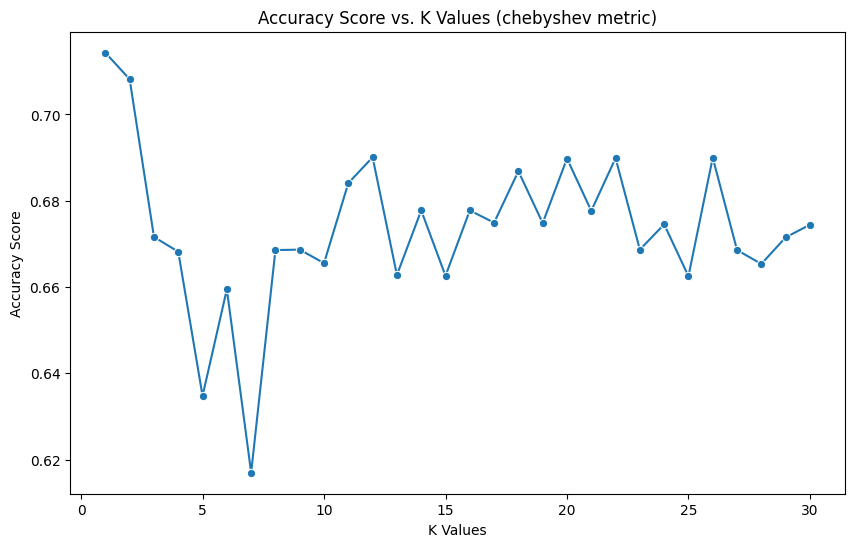

Dla metryki: chebyshev najlepsze K to: 1 dokladnosc wynosi dla niego: 0.7142992424242425


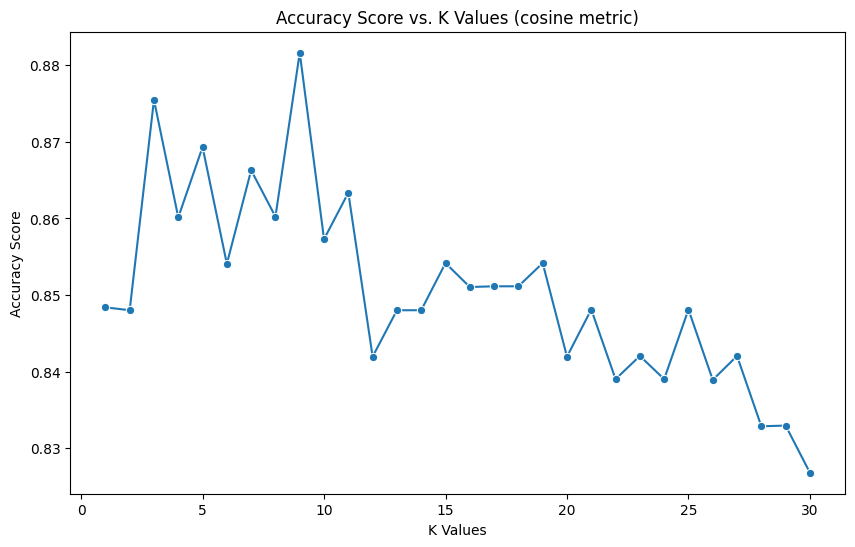

Dla metryki: cosine najlepsze K to: 9 dokladnosc wynosi dla niego: 0.8816287878787878


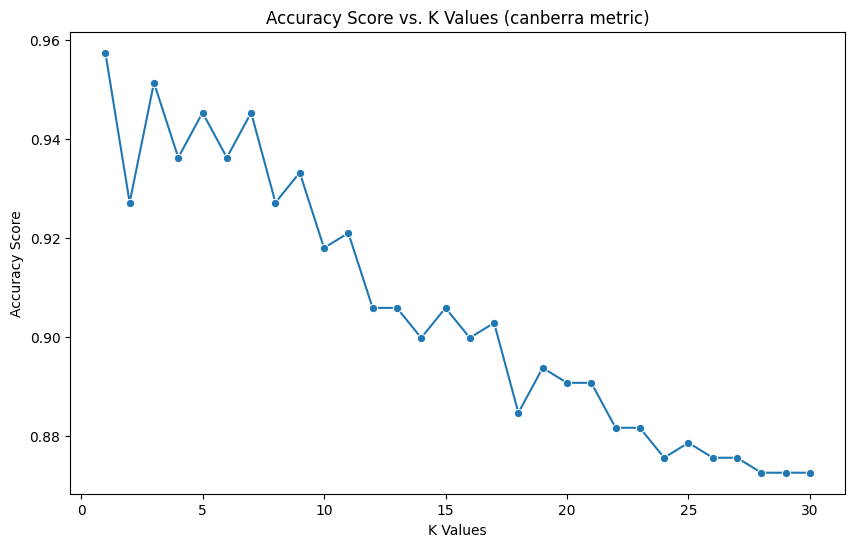

Dla metryki: canberra najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9574810606060605


In [35]:
#Dane nieznormalizowane testy dla roznych metryk
X, y = split(df)
all_data = []
# Użycie funkcji z metryką euklidesową
all_data.append(evaluate_knn_with_metric(X, y, metric="euclidean"))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X, y, metric="manhattan"))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X, y, metric="chebyshev"))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X, y, metric="cosine"))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X, y, metric="canberra"))

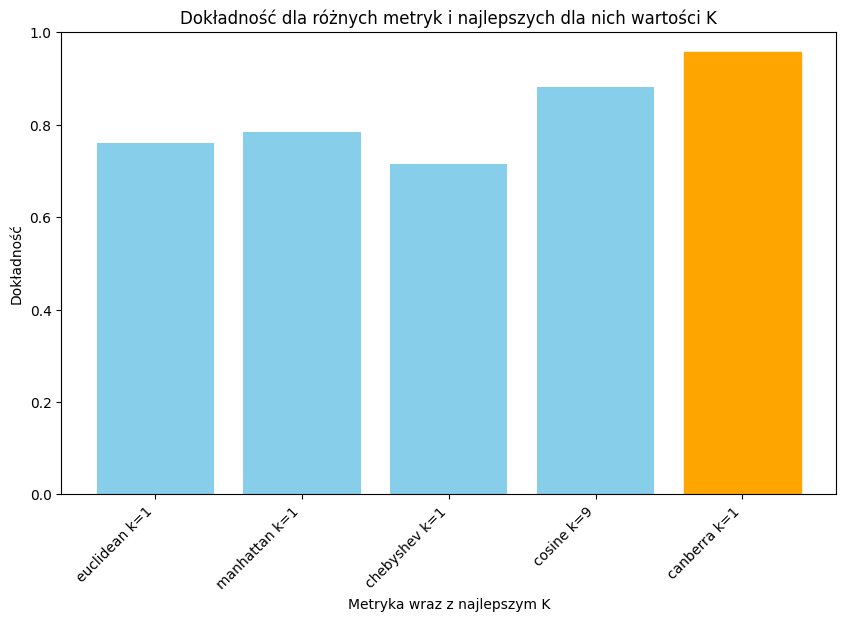

In [36]:
plot_accuracy(all_data)

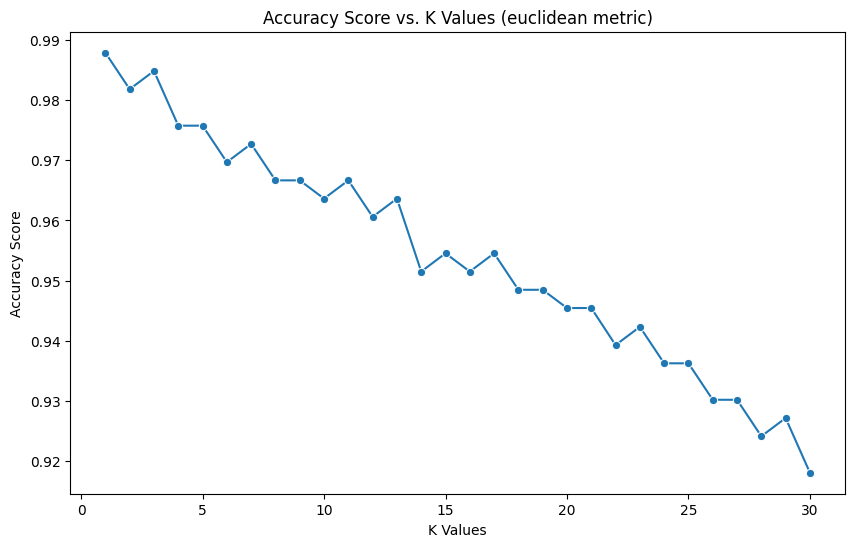

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9878787878787879


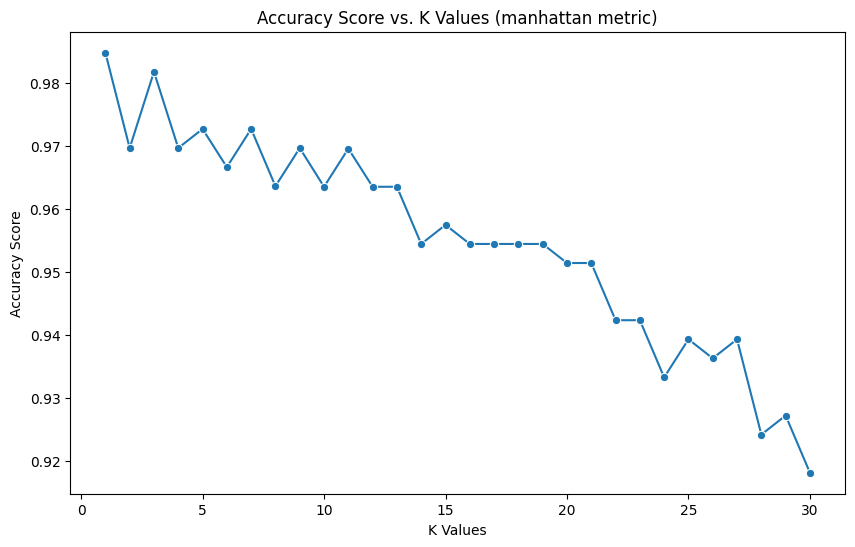

Dla metryki: manhattan najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9848484848484848


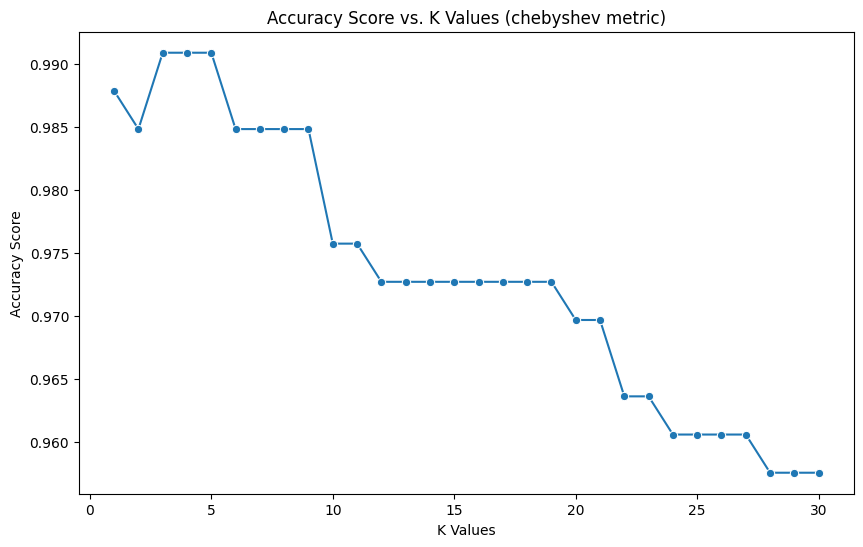

Dla metryki: chebyshev najlepsze K to: 3 dokladnosc wynosi dla niego: 0.990909090909091


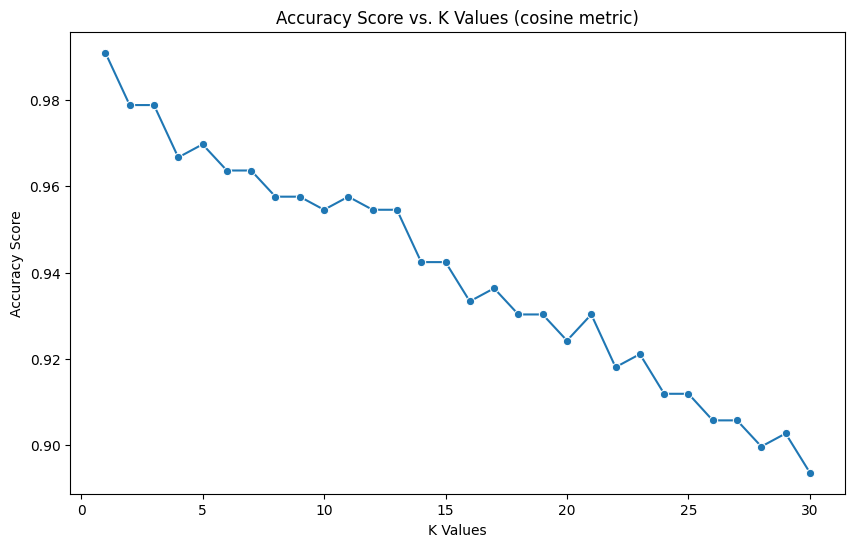

Dla metryki: cosine najlepsze K to: 1 dokladnosc wynosi dla niego: 0.990909090909091


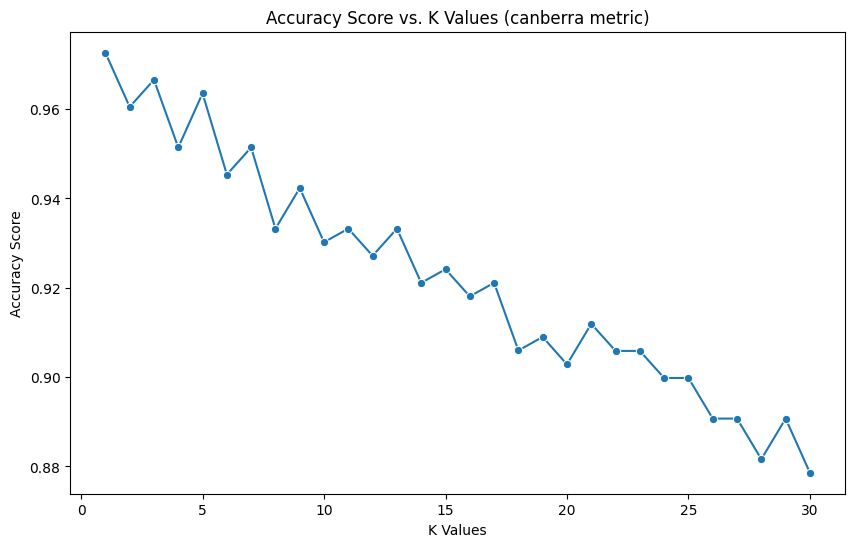

Dla metryki: canberra najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9726325757575758


In [37]:
#Dane znormalizowane min-max dla roznych metryk
df_norm = DataProc.NormalizeMinMax(df.copy())
X_norm, y_norm = split(df_norm)
all_data = []
# Użycie funkcji z metryką euklidesową
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="euclidean"))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="manhattan"))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="chebyshev"))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="cosine"))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="canberra"))

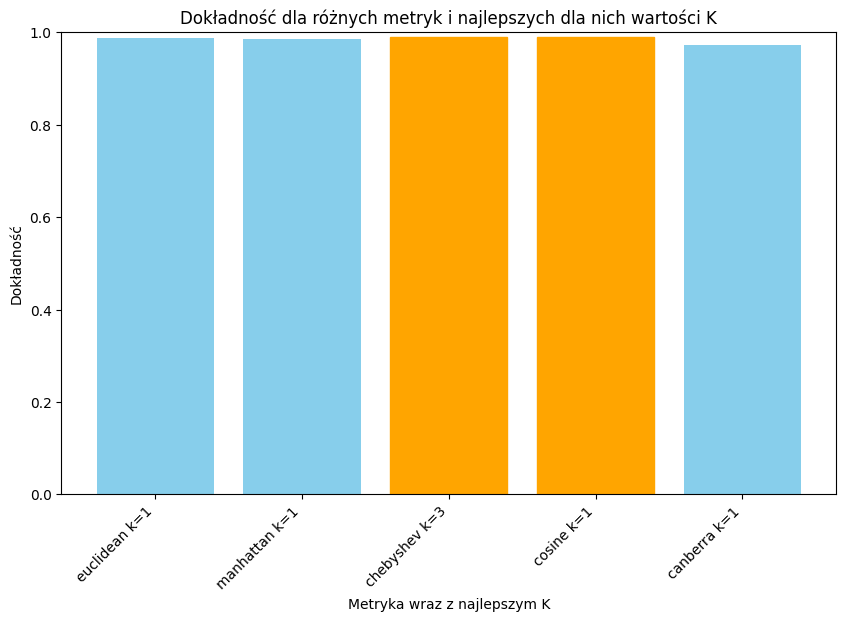

In [38]:
plot_accuracy(all_data)

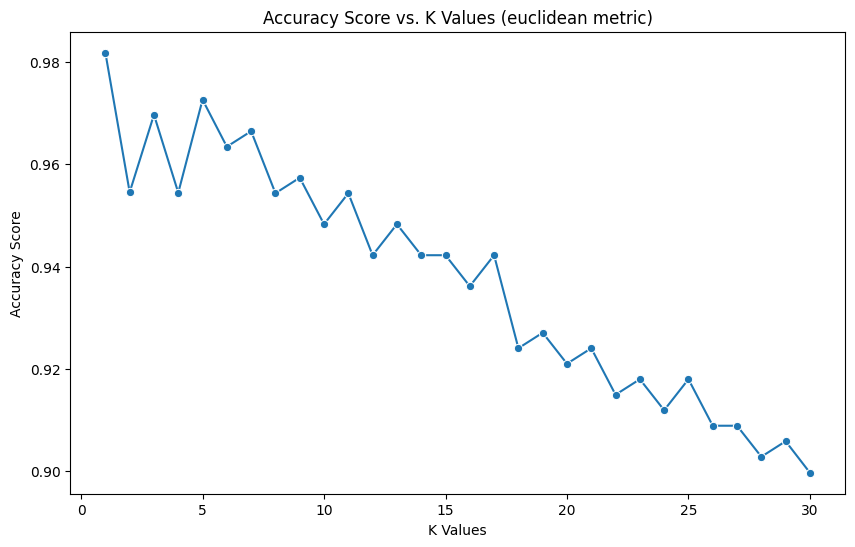

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9818181818181818


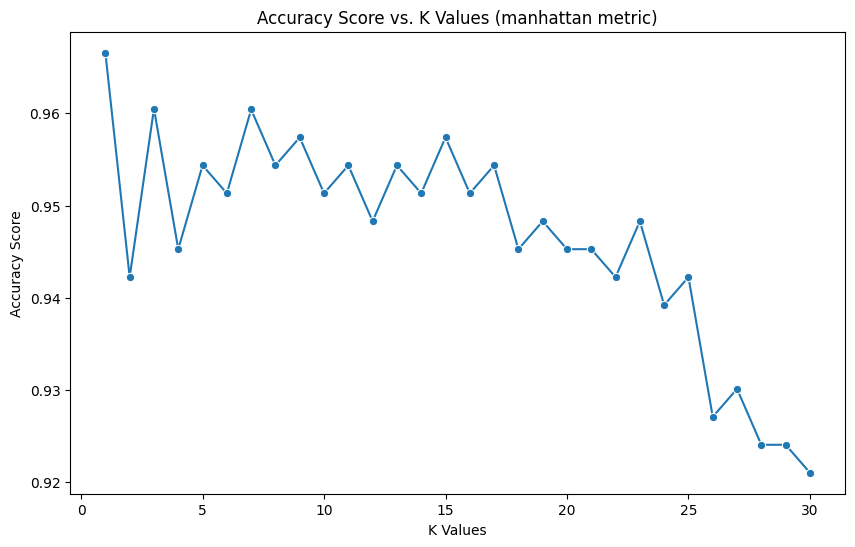

Dla metryki: manhattan najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9665719696969697


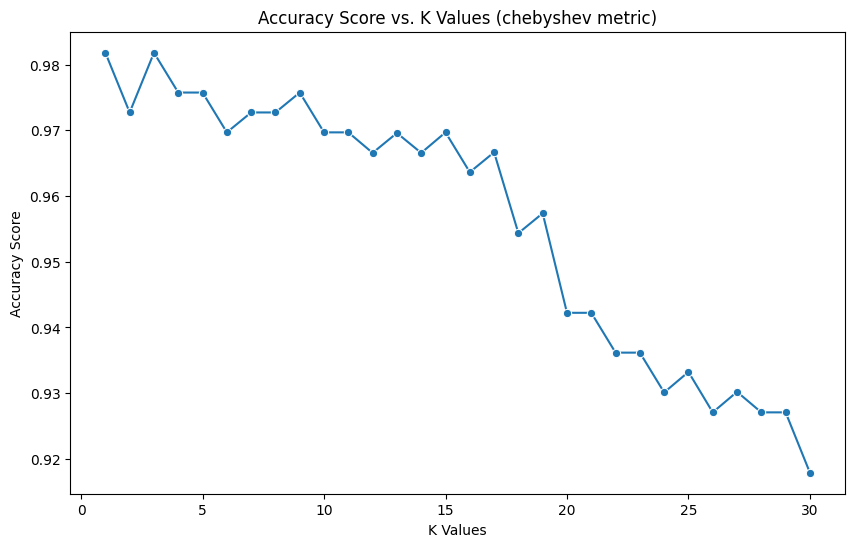

Dla metryki: chebyshev najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9818181818181818


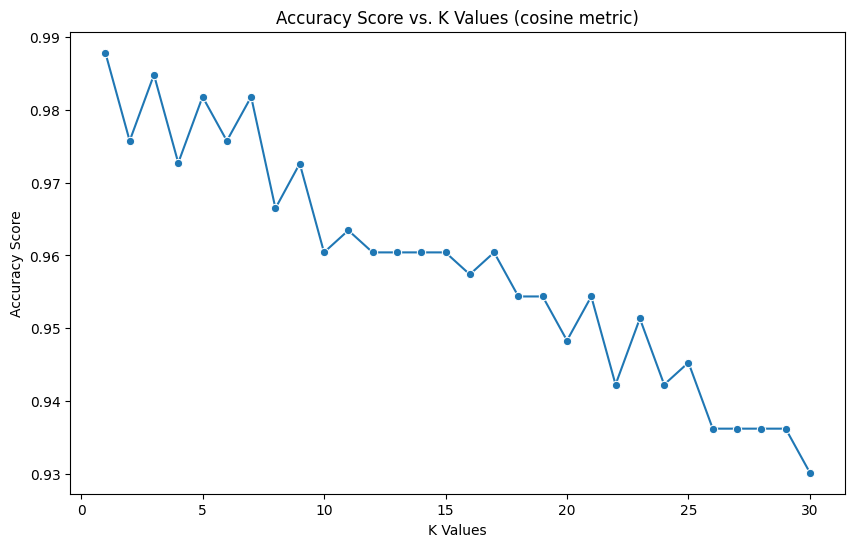

Dla metryki: cosine najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9878787878787879


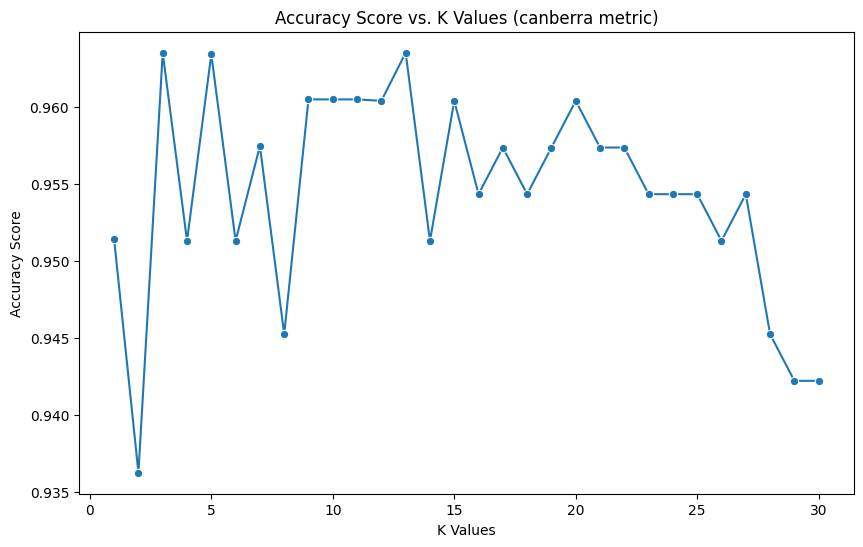

Dla metryki: canberra najlepsze K to: 3 dokladnosc wynosi dla niego: 0.9635416666666667


In [39]:
#Dane ustandaryzowane (Z-score normalization) dla roznych metryk
df_stand = DataProc.StandardizeZScore(df.copy())
X_stand, y_stand = split(df_stand)
all_data = []
# Użycie funkcji z metryką euklidesową
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="euclidean"))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="manhattan"))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="chebyshev"))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="cosine"))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="canberra"))

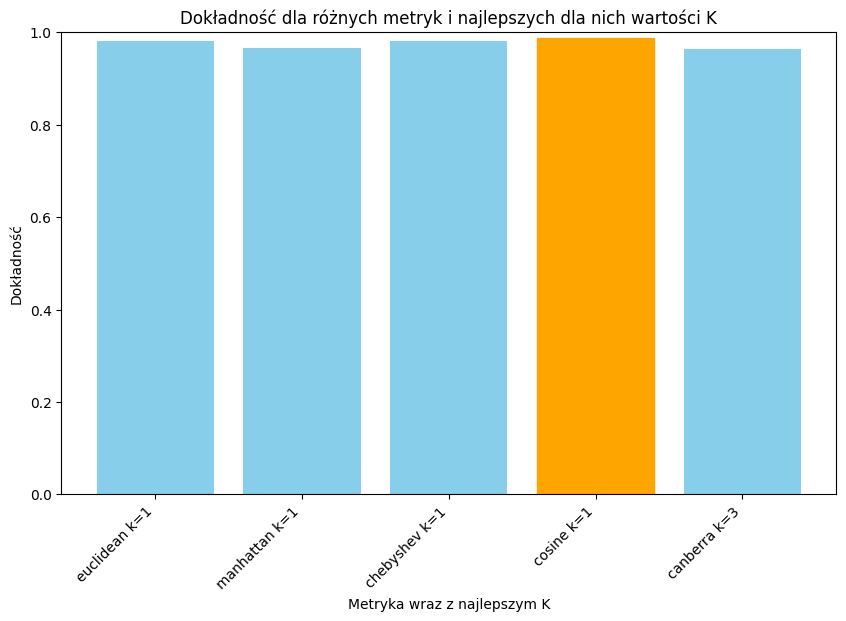

In [40]:
plot_accuracy(all_data)

In [41]:
#Przy okazji sprawdzam czy standaryzacja dziala ok, jak widac tak bo średnia jest dla kazdej kolumny bliska 0, a odchylenie 1
df_stand.describe()

age  blood_pressure  specific_gravity       albumin       sugar  \
count  329.000000    3.290000e+02      3.290000e+02  3.290000e+02  329.000000   
mean     0.000000    3.671497e-16     -8.077294e-15 -8.638817e-17    0.000000   
std      1.000000    1.000000e+00      1.000000e+00  1.000000e+00    1.000000   
min     -2.807669   -1.959214e+00     -2.171484e+00 -7.567025e-01   -0.400404   
25%     -0.542705   -4.738004e-01     -1.297519e+00 -7.567025e-01   -0.400404   
50%      0.096131    2.689062e-01      4.504114e-01 -7.567025e-01   -0.400404   
75%      0.734968    2.689062e-01      4.504114e-01  7.032271e-01   -0.400404   
max      2.303020    7.695972e+00      1.324377e+00  2.893122e+00    4.311052   

           pus_cell  pus_cell_clumps      bacteria  blood_glucose_random  \
count  3.290000e+02       329.000000  3.290000e+02          3.290000e+02   
mean   2.159704e-17         0.000000 -3.239557e-17         -2.591645e-16   
std    1.000000e+00         1.000000  1.000000e+00          1.000000e+00   
min   -5.472497e-01        -0.376734 -2.607193e-01         -1.680011e+00   
25%   -5.472497e-01        -0.376734 -2.607193e-01         -6.114122e-01   
50%   -5.472497e-01        -0.376734 -2.607193e-01         -2.774750e-01   
75%   -5.472497e-01        -0.376734 -2.607193e-01          3.520021e-03   
max    1.821765e+00         2.646326  3.823884e+00          4.571293e+00   

         blood_urea  ...  packed_cell_volume  white_blood_cell_count  \
count  3.290000e+02  ...        3.290000e+02            3.290000e+02   
mean  -1.079852e-16  ...        2.591645e-16            4.103438e-16   
std    1.000000e+00  ...        1.000000e+00            1.000000e+00   
min   -1.093598e+00  ...       -3.693358e+00           -2.316449e+00   
25%   -5.904614e-01  ...       -6.361442e-01           -5.983433e-01   
50%   -2.618824e-01  ...       -3.882603e-02            1.545346e-03   
75%    5.490320e-02  ...        7.090297e-01            3.727598e-01   
max    6.905248e+00  ...        1.809627e+00            6.722280e+00   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
count          3.290000e+02  3.290000e+02       3.290000e+02   
mean           1.295823e-16 -4.319409e-17       1.295823e-16   
std            1.000000e+00  1.000000e+00       1.000000e+00   
min           -3.134329e+00 -7.028148e-01      -6.409094e-01   
25%           -2.706337e-01 -7.028148e-01      -6.409094e-01   
50%           -2.312098e-02 -7.028148e-01      -6.409094e-01   
75%            5.646109e-01  1.418525e+00       1.555540e+00   
max            3.905589e+00  1.418525e+00       1.555540e+00   

       coronary_artery_disease      appetite    peda_edema       aanemia  \
count             3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02   
mean              5.399261e-17 -1.727763e-16  2.159704e-17 -2.159704e-17   
std               1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min              -2.924855e-01 -1.974478e+00 -4.715616e-01 -3.974533e-01   
25%              -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
50%              -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
75%              -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
max               3.408581e+00  5.049237e-01  2.114168e+00  2.508372e+00   

       classification  
count      329.000000  
mean         0.589666  
std          0.492644  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

[8 rows x 24 columns]

In [42]:
#Dla normalizacji podobnie tylko tym razem wartosci min max są w przedziale 0 do 1
df_norm.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  329.000000      329.000000        329.000000  329.000000  329.000000   
mean     0.549372        0.202918          0.621159    0.207326    0.084985   
std      0.195668        0.103571          0.286053    0.273986    0.212249   
min      0.000000        0.000000          0.000000    0.000000    0.000000   
25%      0.443182        0.153846          0.250000    0.000000    0.000000   
50%      0.568182        0.230769          0.750000    0.000000    0.000000   
75%      0.693182        0.230769          0.750000    0.400000    0.000000   
max      1.000000        1.000000          1.000000    1.000000    1.000000   

         pus_cell  pus_cell_clumps    bacteria  blood_glucose_random  \
count  329.000000       329.000000  329.000000            329.000000   
mean     0.231003         0.124620    0.063830              0.268746   
std      0.422116         0.330791    0.244822              0.159967   
min      0.000000         0.000000    0.000000              0.000000   
25%      0.000000         0.000000    0.000000              0.170940   
50%      0.000000         0.000000    0.000000              0.224359   
75%      0.000000         0.000000    0.000000              0.269309   
max      1.000000         1.000000    1.000000              1.000000   

       blood_urea  ...  packed_cell_volume  white_blood_cell_count  \
count  329.000000  ...          329.000000              329.000000   
mean     0.136719  ...            0.671155                0.256280   
std      0.125018  ...            0.181720                0.110635   
min      0.000000  ...            0.000000                0.000000   
25%      0.062901  ...            0.555556                0.190083   
50%      0.103979  ...            0.664100                0.256451   
75%      0.143583  ...            0.800000                0.297521   
max      1.000000  ...            1.000000                1.000000   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
count            329.000000    329.000000         329.000000   
mean               0.445222      0.331307           0.291793   
std                0.142047      0.471400           0.455280   
min                0.000000      0.000000           0.000000   
25%                0.406780      0.000000           0.000000   
50%                0.441938      0.000000           0.000000   
75%                0.525424      1.000000           1.000000   
max                1.000000      1.000000           1.000000   

       coronary_artery_disease    appetite  peda_edema     aanemia  \
count               329.000000  329.000000  329.000000  329.000000   
mean                  0.079027    0.796353    0.182371    0.136778   
std                   0.270192    0.403323    0.386738    0.344136   
min                   0.000000    0.000000    0.000000    0.000000   
25%                   0.000000    1.000000    0.000000    0.000000   
50%                   0.000000    1.000000    0.000000    0.000000   
75%                   0.000000    1.000000    0.000000    0.000000   
max                   1.000000    1.000000    1.000000    1.000000   

       classification  
count      329.000000  
mean         0.589666  
std          0.492644  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

[8 rows x 24 columns]

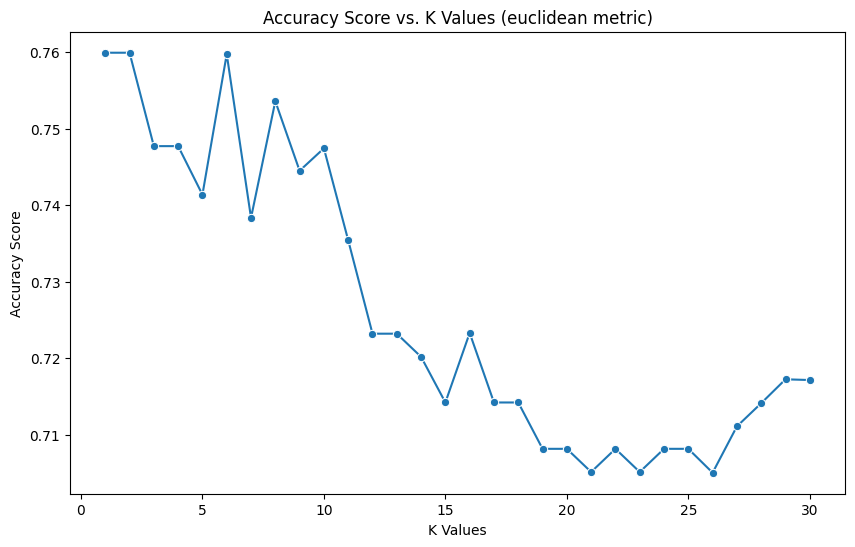

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.7599431818181819


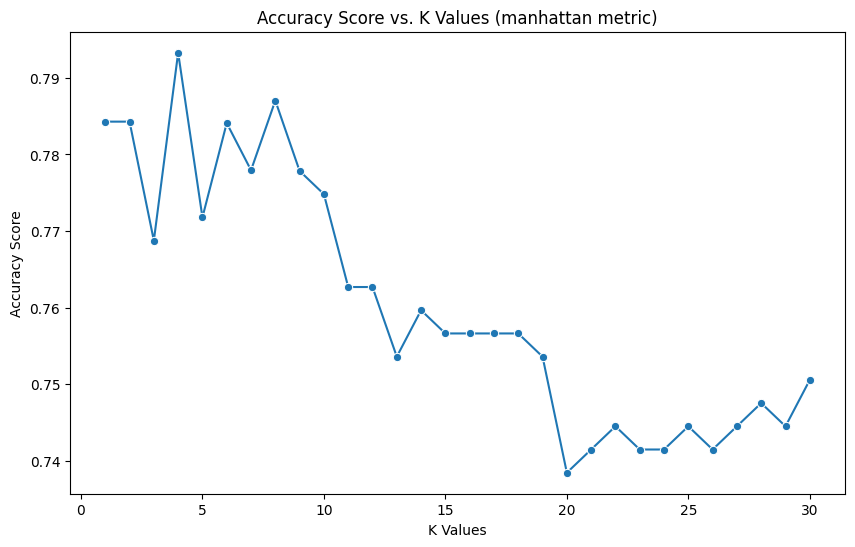

Dla metryki: manhattan najlepsze K to: 4 dokladnosc wynosi dla niego: 0.7932765151515151


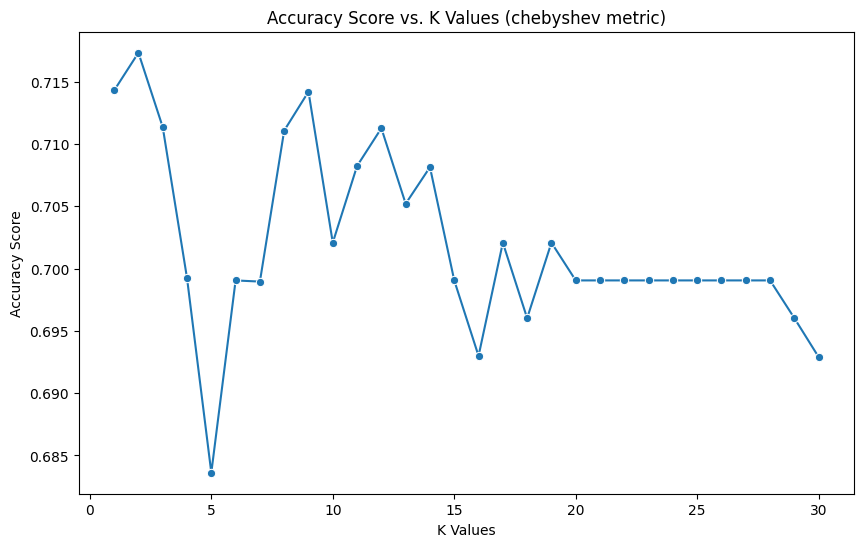

Dla metryki: chebyshev najlepsze K to: 2 dokladnosc wynosi dla niego: 0.7173295454545455


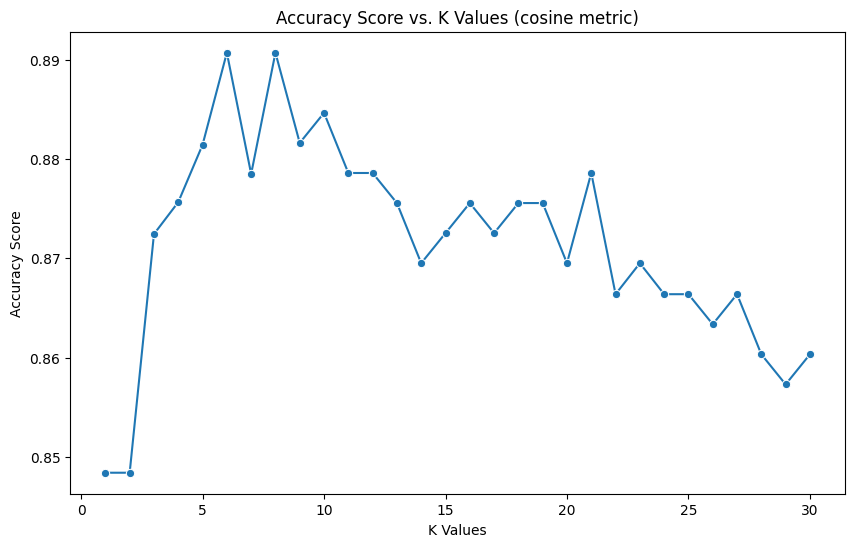

Dla metryki: cosine najlepsze K to: 8 dokladnosc wynosi dla niego: 0.8907196969696971


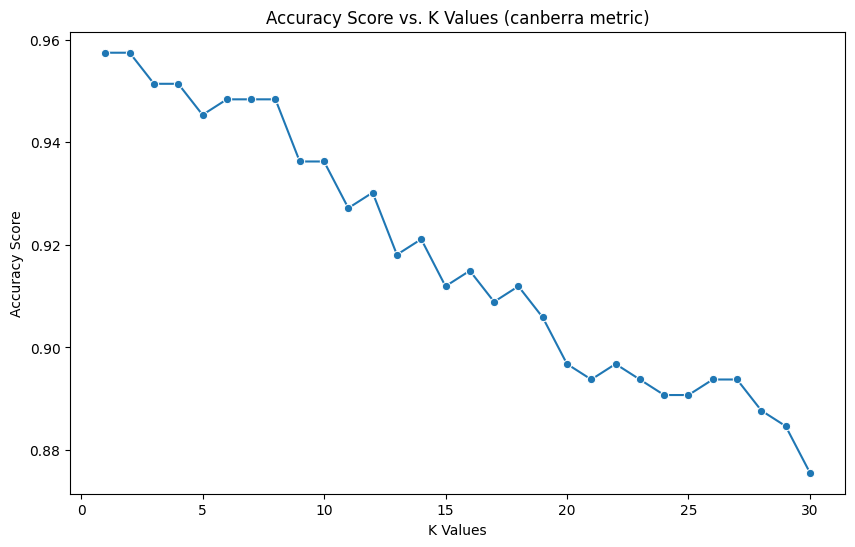

Dla metryki: canberra najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9574810606060605


In [43]:
#Tutaj z uwzglednieniem wag: ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of 
#a query point will have a greater influence than neighbors which are further away.
#Dane nieznormalizowane testy dla roznych metryk
all_data = []
# Użycie funkcji z metryką euklidesową
all_data.append(evaluate_knn_with_metric(X, y, metric="euclidean", weight=True))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X, y, metric="manhattan", weight=True))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X, y, metric="chebyshev", weight=True))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X, y, metric="cosine", weight=True))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X, y, metric="canberra", weight=True))

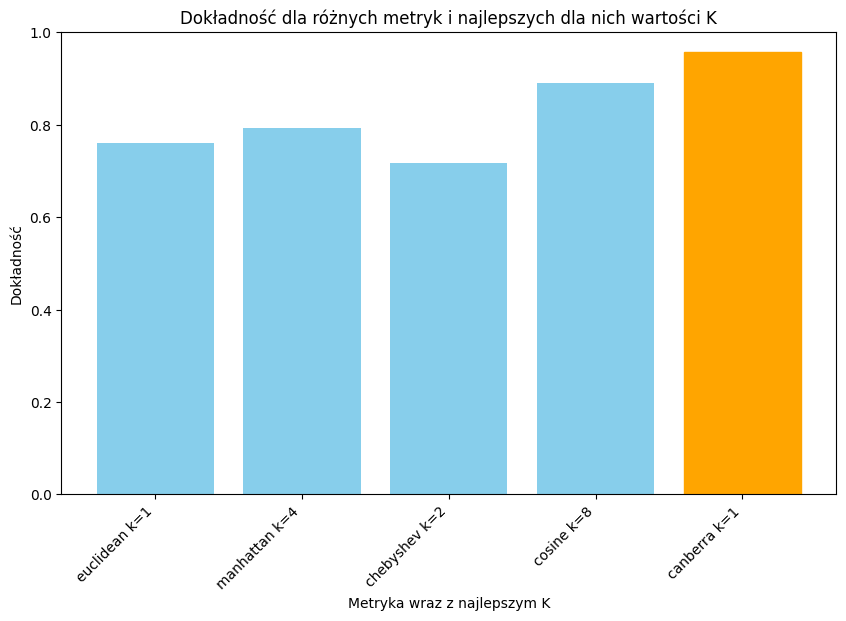

In [44]:
plot_accuracy(all_data)

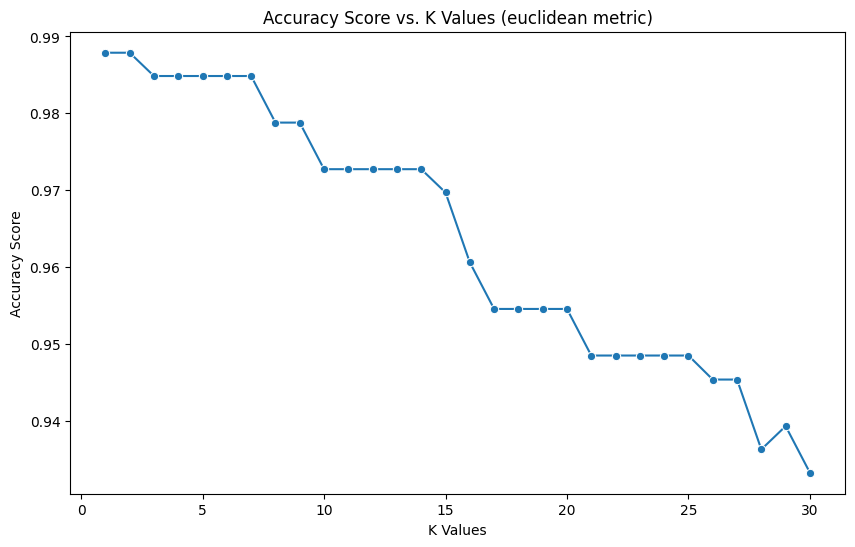

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9878787878787879


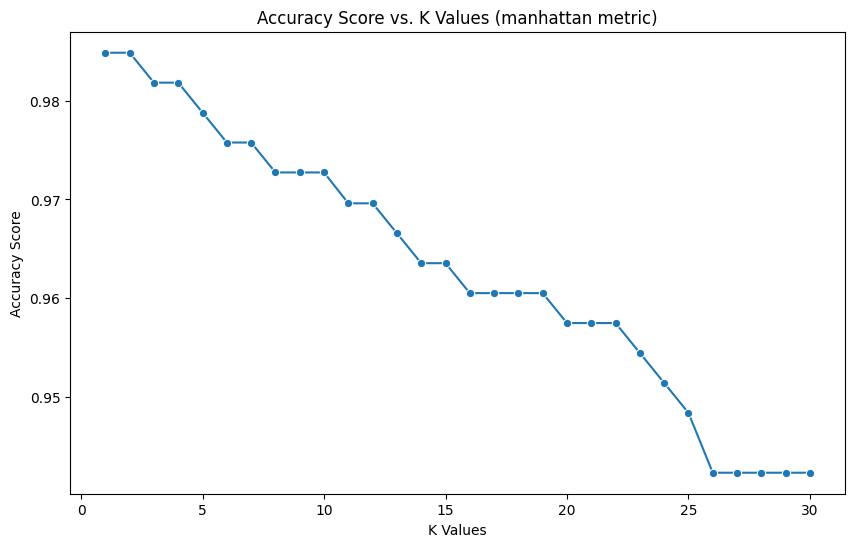

Dla metryki: manhattan najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9848484848484848


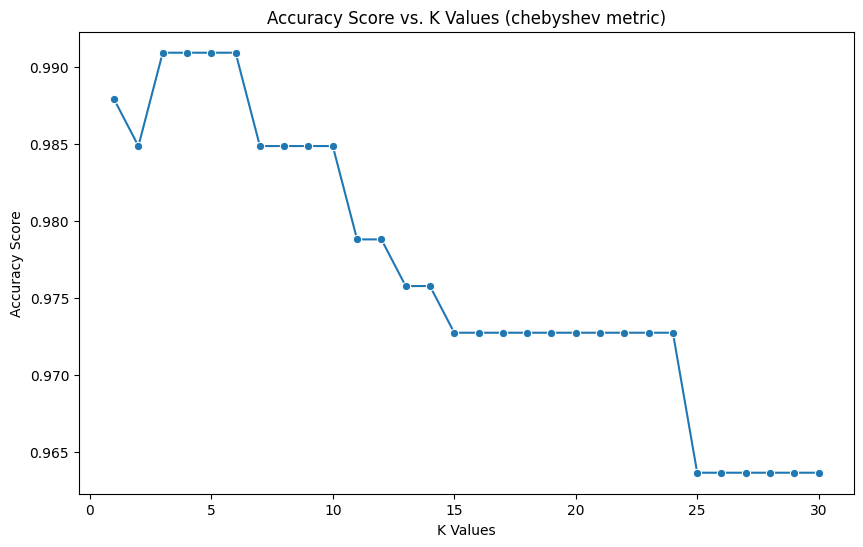

Dla metryki: chebyshev najlepsze K to: 3 dokladnosc wynosi dla niego: 0.990909090909091


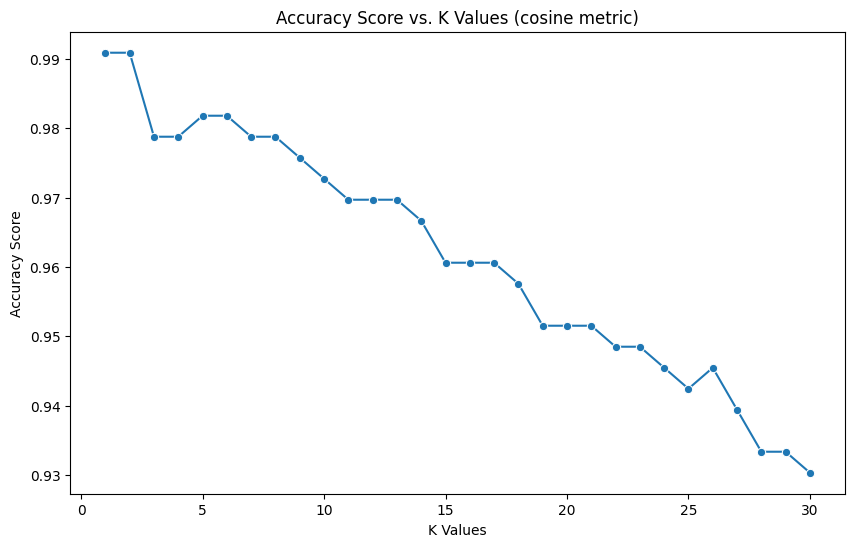

Dla metryki: cosine najlepsze K to: 1 dokladnosc wynosi dla niego: 0.990909090909091


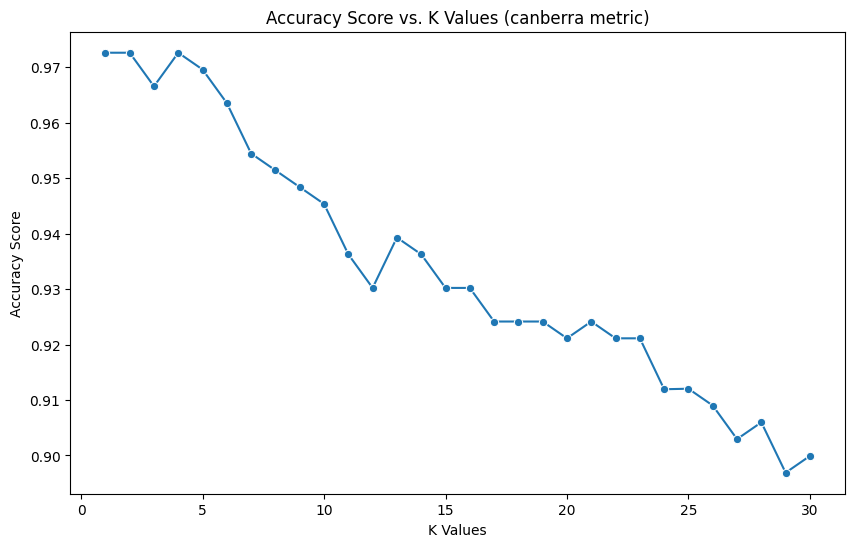

Dla metryki: canberra najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9726325757575758


In [45]:
#Wagi cd ale tym razem 
##Dane znormalizowane dla roznych metryk k
all_data = []
# Użycie funkcji z domyślną metryką euklidesową
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="euclidean", weight=True))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="manhattan", weight=True))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="chebyshev", weight=True))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="cosine", weight=True))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X_norm, y_norm, metric="canberra", weight=True))

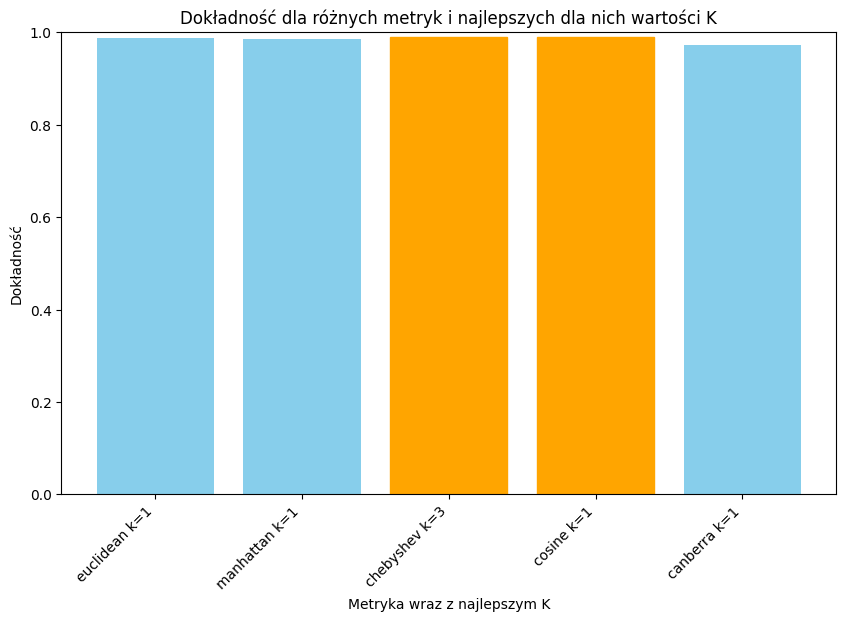

In [46]:
plot_accuracy(all_data)

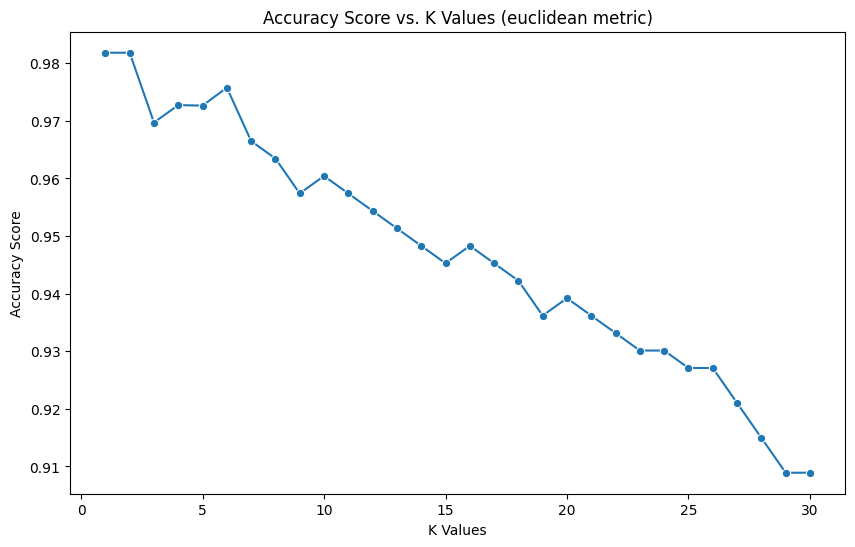

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9818181818181818


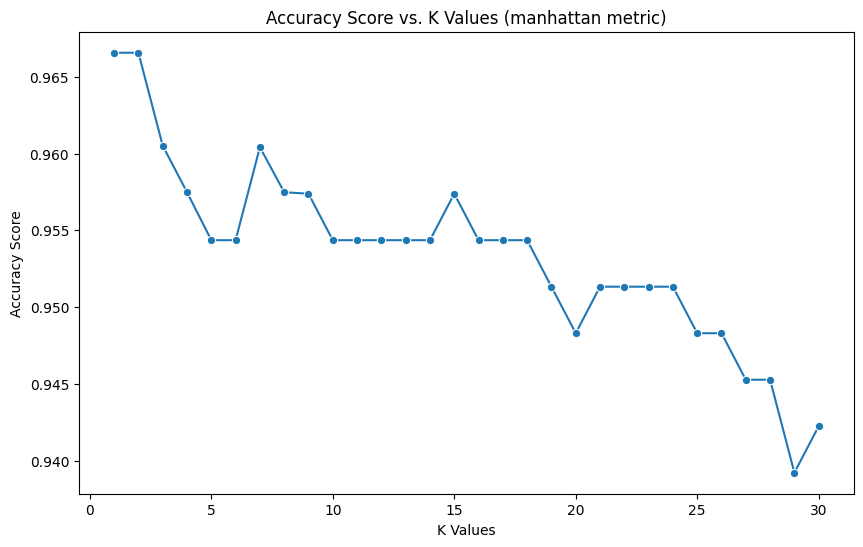

Dla metryki: manhattan najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9665719696969697


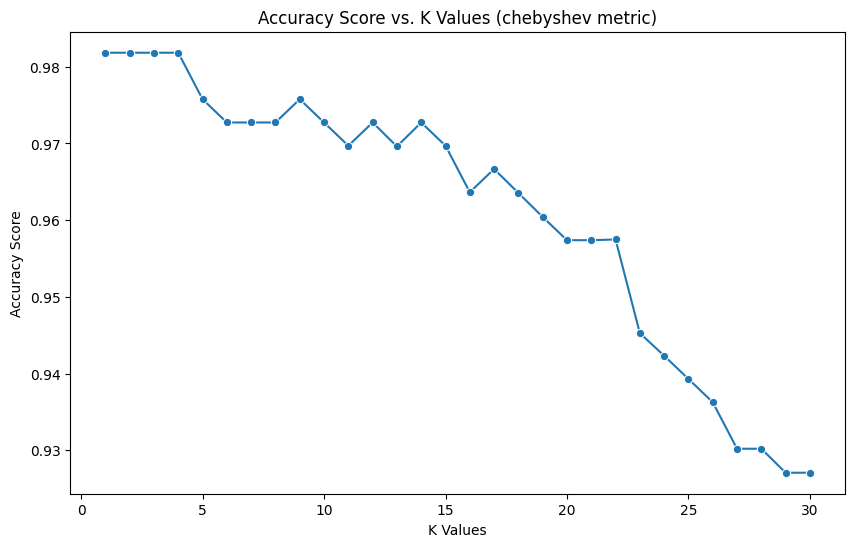

Dla metryki: chebyshev najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9818181818181818


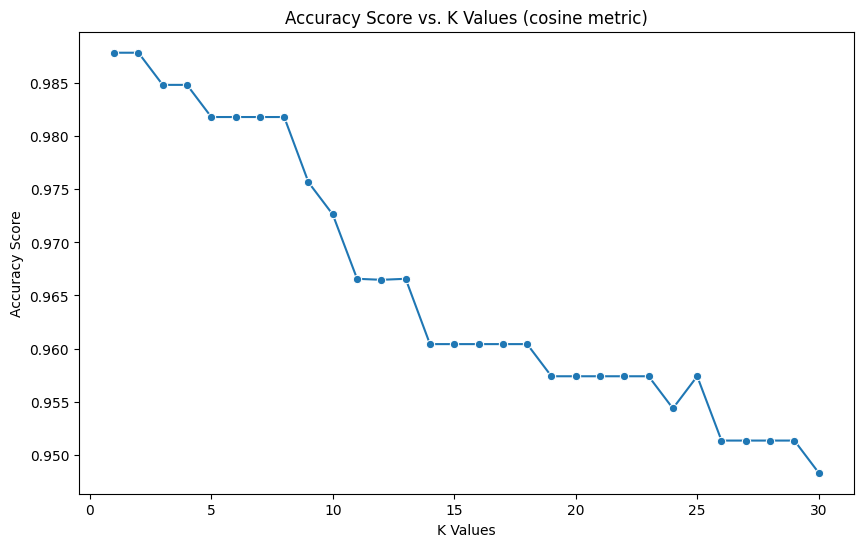

Dla metryki: cosine najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9878787878787879


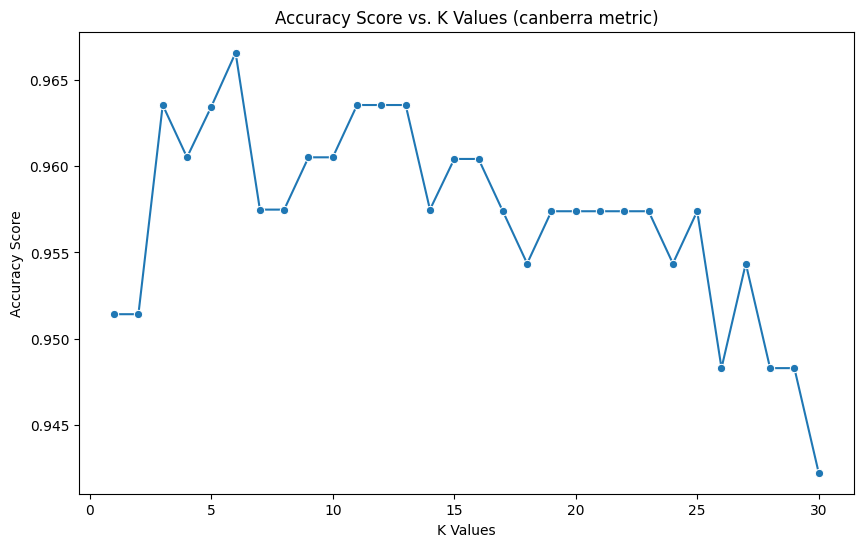

Dla metryki: canberra najlepsze K to: 6 dokladnosc wynosi dla niego: 0.9665719696969697


In [47]:
#I wagi dla danych ustandaryzowanych
all_data = []
# Użycie funkcji z domyślną metryką euklidesową
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="euclidean", weight=True))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="manhattan", weight=True))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="chebyshev", weight=True))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="cosine", weight=True))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X_stand, y_stand, metric="canberra", weight=True))

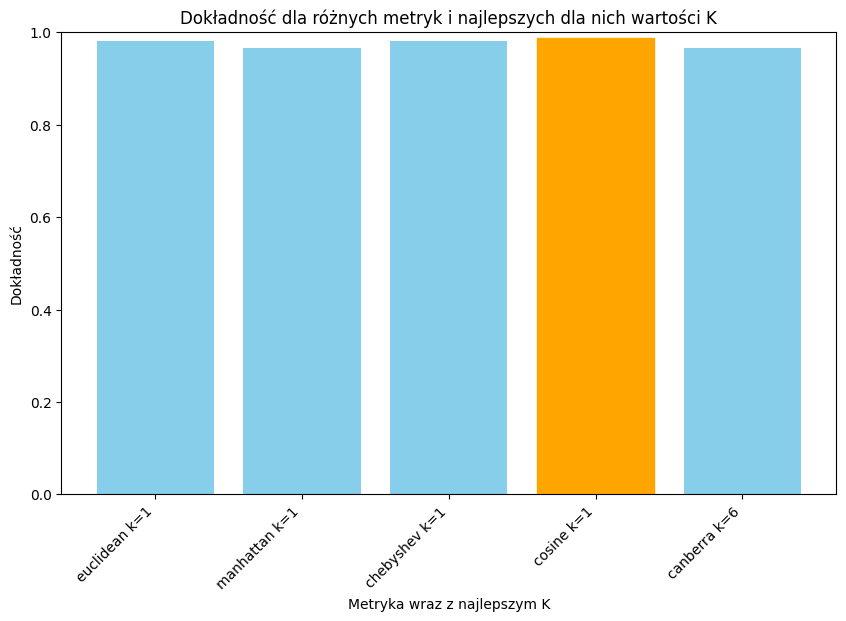

In [48]:
plot_accuracy(all_data)

In [49]:
#Dokumentacja KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#Tutaj wzory są opisane te które uzywam w KNN https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [70]:
#Jakies testy PCA source: https://ichi.pro/pl/analiza-glownych-komponentow-pca-ze-scikit-learn-33554981925296
#najpierw dla danych znormalizowanych min-max
from sklearn.decomposition import PCA
df_copy = df_norm.copy()
DataProc.Shuffle(df_copy)
y = df_copy.pop('classification')
X = df_copy
pca_23 = PCA(n_components=23, random_state=2020)
pca_23.fit(X)
X_pca_23 = pca_23.transform(X)
np.cumsum(pca_23.explained_variance_ratio_ * 100)

array([ 40.09676948,  51.00748372,  59.22542321,  65.78367894,
        71.46163158,  75.85817229,  79.73313778,  83.29354637,
        86.62106557,  89.33354345,  91.37072518,  93.37101079,
        94.84585698,  95.97087667,  96.84691497,  97.49078307,
        98.08270524,  98.58080404,  99.02842796,  99.43434078,
        99.67649146,  99.86527375, 100.        ])

Text(0, 0.5, 'Explained variance')

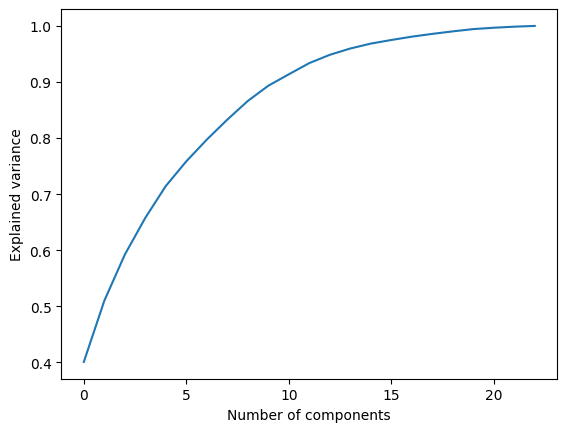

In [71]:
plt.plot(np.cumsum(pca_23.explained_variance_ratio_ ))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [72]:
pca_14 = PCA(n_components=14, random_state=2020)
pca_14.fit(X)
#X_pca_14 = pca_14.transform(X)
X_PCA14 = pd.DataFrame(pca_14.transform(X), columns=[f'PCA{i}' for i in range(1, 15)], index=X.index) #To ostatnei do zachowania indexów
X_PCA14

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    0.215446 -0.064032 -0.030774  1.136231  0.336965  0.071264  0.096159   
1    0.817933 -0.693142 -0.216277 -0.202362  0.695281  0.142658  0.040678   
2    0.933384 -0.589382 -0.486663  0.752139 -0.491075  0.124514 -0.219518   
3   -0.748733 -0.015396 -0.015412 -0.017459 -0.020494 -0.119507 -0.081714   
4   -0.748117  0.026801 -0.042969  0.002022 -0.004658 -0.076187 -0.061629   
..        ...       ...       ...       ...       ...       ...       ...   
395  1.832789  0.289469 -0.722389  0.262831  0.209532  0.298760 -0.300277   
396 -0.045734  0.377396 -0.747938  0.680798 -0.597280  0.493259  0.155023   
397 -0.730202 -0.015781 -0.015170 -0.002877 -0.020110 -0.117078 -0.075817   
398 -0.706211 -0.023550  0.005892 -0.023969 -0.020649 -0.070756 -0.023590   
399  1.692346 -0.184551 -0.278167 -0.638274 -0.000864 -0.289451  0.209932   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  
0   -0.185940  0.037215  0.105760 -0.088942  0.226887 -0.323459 -0.094699  
1   -0.519410 -0.255733  0.269537 -0.520225 -0.109545 -0.129887  0.001408  
2    0.205765  0.049291 -0.377996  0.078726  0.125803  0.053408 -0.270210  
3    0.145569 -0.056739 -0.076518 -0.046982  0.044880  0.087145  0.013124  
4    0.121012 -0.030149 -0.108817  0.028424 -0.108662 -0.057525  0.138837  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.118006  0.176872  0.085466 -0.093734 -0.213789  0.048968 -0.080628  
396 -0.024875  0.061334  0.139853  0.032464  0.060226 -0.340220 -0.163006  
397  0.144874 -0.046715 -0.070200 -0.045633  0.046465  0.085932  0.034023  
398  0.001910 -0.038305  0.054165 -0.175703  0.143240  0.159307 -0.104160  
399  0.666771  0.117570  0.409345  0.336289 -0.031901 -0.123423 -0.099251  

[329 rows x 14 columns]

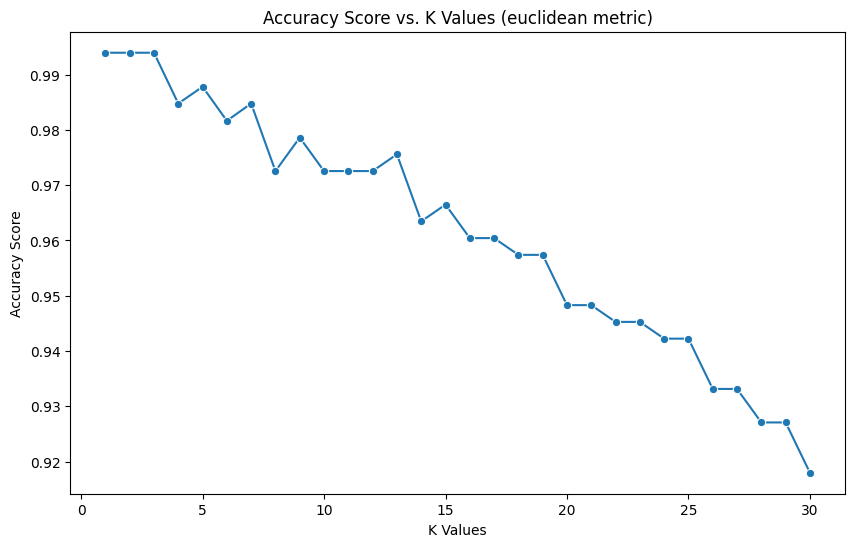

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9939393939393939


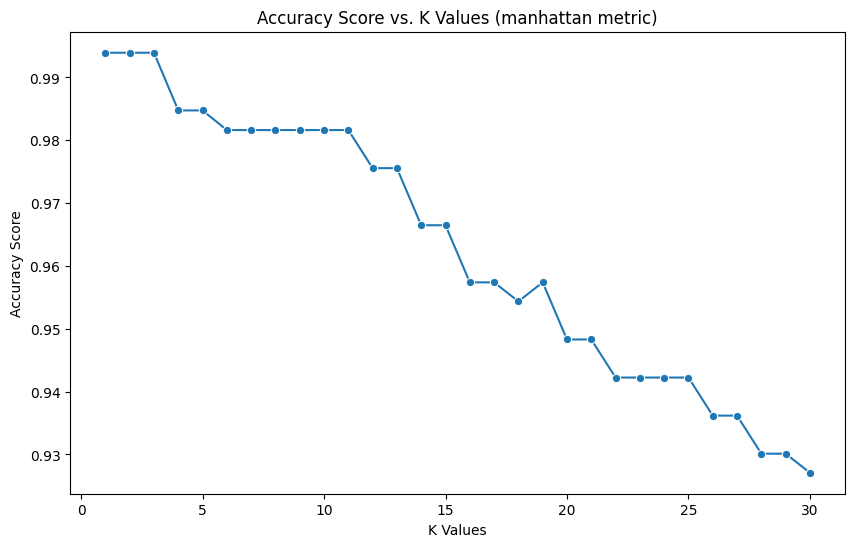

Dla metryki: manhattan najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9939393939393939


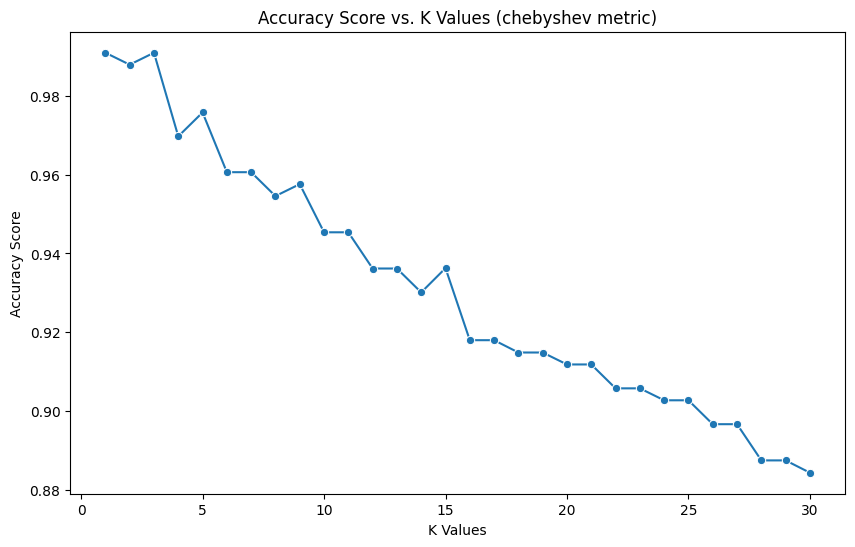

Dla metryki: chebyshev najlepsze K to: 1 dokladnosc wynosi dla niego: 0.990909090909091


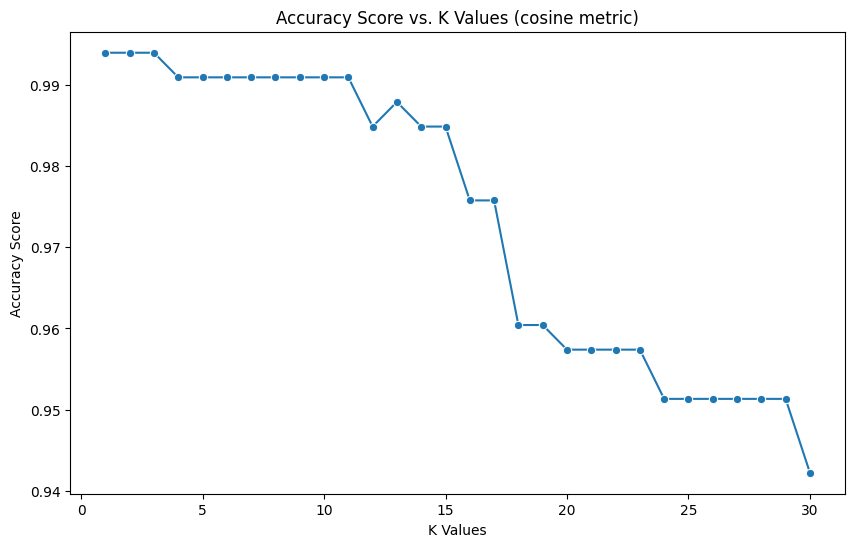

Dla metryki: cosine najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9939393939393939


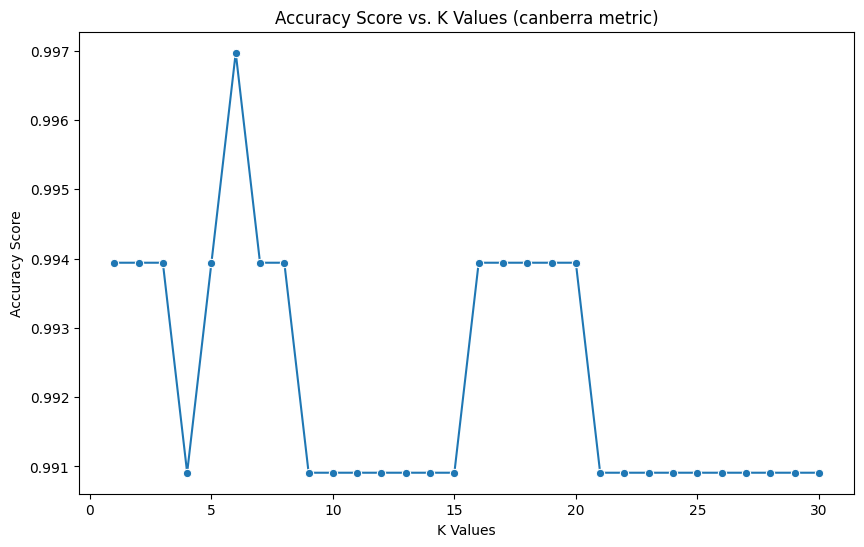

Dla metryki: canberra najlepsze K to: 6 dokladnosc wynosi dla niego: 0.9969696969696968


In [73]:
#Testy dla PCA14 dane znormalizowane
all_data = []
# Użycie funkcji z metryką euklidesową
all_data.append(evaluate_knn_with_metric(X_PCA14, y, metric="euclidean"))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X_PCA14, y, metric="manhattan"))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X_PCA14, y, metric="chebyshev"))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X_PCA14, y, metric="cosine"))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X_PCA14, y, metric="canberra"))

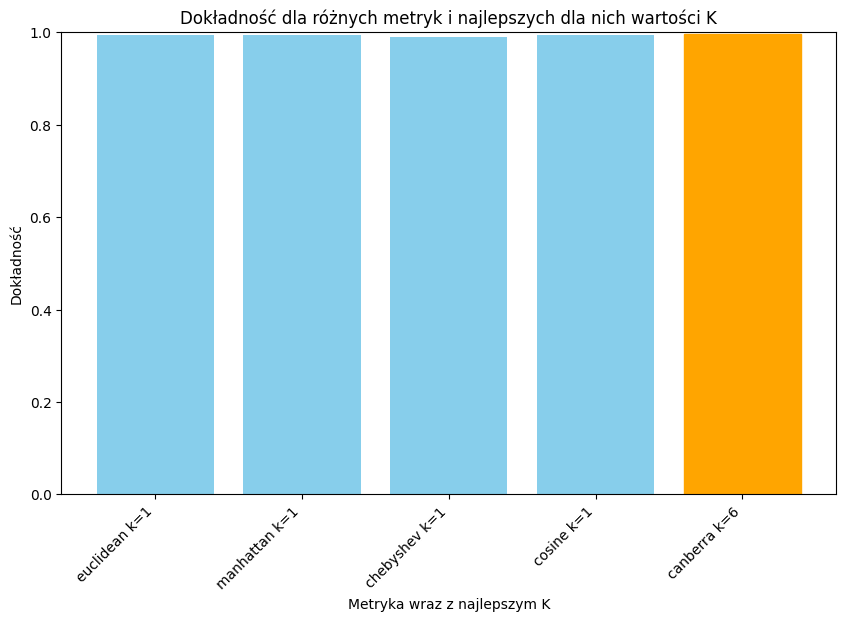

In [74]:
plot_accuracy(all_data)

In [75]:
#PCA dla danych ustandaryzowanych
df_copy = df_stand.copy()
DataProc.Shuffle(df_copy)
y = df_copy.pop('classification')
X = df_copy
pca_23 = PCA(n_components=23, random_state=2020)
pca_23.fit(X)
X_pca_23 = pca_23.transform(X)
np.cumsum(pca_23.explained_variance_ratio_ * 100)

array([ 33.57816231,  41.83449449,  48.62154543,  54.0446868 ,
        58.59544539,  63.01146823,  67.24428574,  71.21580126,
        74.77751053,  78.00461404,  81.04885991,  83.63096538,
        86.07844072,  88.40003094,  90.36522094,  92.17483122,
        93.8849343 ,  95.41336744,  96.70857625,  97.80856674,
        98.80742409,  99.46145441, 100.        ])

Text(0, 0.5, 'Explained variance')

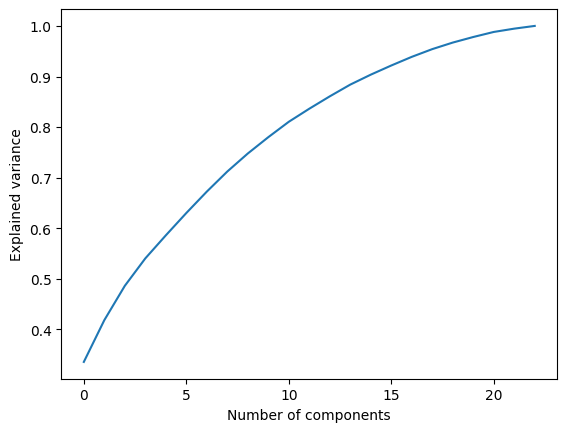

In [76]:
plt.plot(np.cumsum(pca_23.explained_variance_ratio_ ))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [77]:
pca_18 = PCA(n_components=18, random_state=2020)
pca_18.fit(X)
#X_pca_18 = pca_18.transform(X)
X_PCA18 = pd.DataFrame(pca_18.transform(X), columns=[f'PCA{i}' for i in range(1, 19)], index=X.index) #To ostatnei do zachowania indexów
X_PCA18

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0   -3.432488 -0.584149  0.476172  0.677420 -0.243369 -0.620061  0.685441   
1   -1.085809 -0.668688  1.152226 -0.299504  0.672129  0.168641  0.032211   
2    4.575990  0.656072  2.123646 -0.857630 -2.540613 -0.826296  1.438750   
3   -2.475011  0.071740  0.081829 -0.295978  0.947219 -0.546768  0.300681   
4   -1.430860  3.107317  1.472736  0.735282 -2.088686 -1.412513 -0.858935   
..        ...       ...       ...       ...       ...       ...       ...   
395 -2.231901  0.192012  0.051359 -0.173550  0.353471  0.351701  0.516092   
396 -1.092467  0.018736 -0.100420 -0.551293  0.606988  1.297533 -1.861959   
397 -2.871159 -0.453367  0.213303  0.301402 -0.053206 -0.399208 -0.027672   
398  0.208161 -0.074831 -0.604589 -1.313790  0.832867 -0.159545  0.090928   
399 -3.020909 -0.418421 -0.109116  0.159817  0.230496 -0.506286 -0.475287   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0    0.132092 -0.290582  0.674236 -0.399800 -0.168377 -0.123802  0.264489   
1   -0.197324  0.389648 -0.936646  1.444227  0.282199  1.015326 -0.793115   
2    1.414122  0.160903  0.531314  0.747889  0.134371  0.616981  0.248564   
3    0.053666 -0.446563 -0.870899  0.603015 -0.403955  0.118306 -0.130734   
4    1.169225 -0.355776  0.209733  0.810470 -0.015274  0.646066 -0.035889   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.565987 -0.078485  0.427965  0.248188 -0.410064 -0.281501 -0.175519   
396  0.703923  0.535718 -0.560692  0.056364  1.148948  0.313821  0.155749   
397  0.393526 -0.245549  0.502240 -0.122191  0.066280 -0.321208  0.173471   
398 -1.053076  0.770696 -1.401485 -0.039784 -0.520148 -0.743273 -0.007400   
399  1.067024 -0.276369 -0.188168  0.199778  0.513695  0.085691  0.183859   

        PCA15     PCA16     PCA17     PCA18  
0   -0.645872 -0.235971 -0.425915 -0.370258  
1   -0.234296  0.078810  0.226927  0.220860  
2   -1.111270 -0.152002 -1.025097  1.384796  
3    0.756362  0.194088 -0.087311  0.002506  
4   -0.257025 -0.079129 -0.914072 -1.005428  
..        ...       ...       ...       ...  
395 -0.053676 -0.523684  0.144934  0.526489  
396  0.531473 -0.278788 -0.076238  0.262494  
397 -0.261132  0.216565 -0.036111 -0.061221  
398  0.468446  0.332284  0.211272  0.672159  
399 -0.005235  0.371613 -0.309814 -0.588070  

[329 rows x 18 columns]

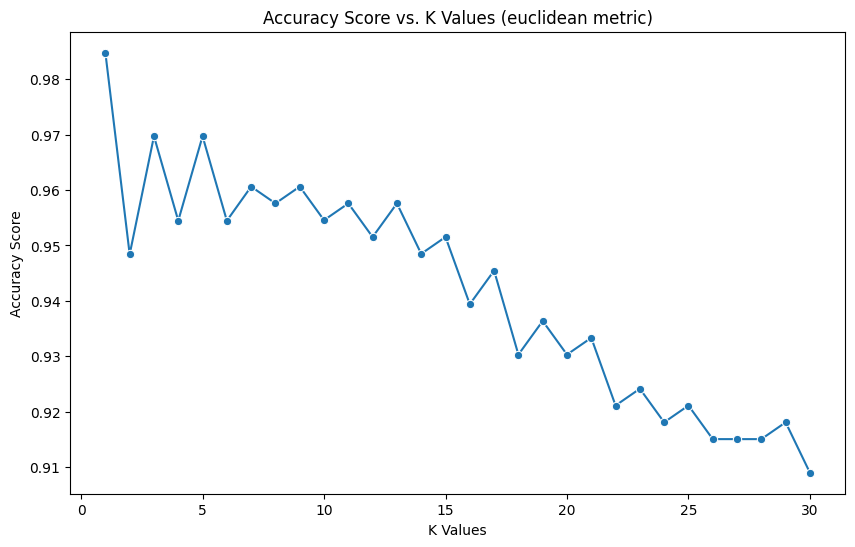

Dla metryki: euclidean najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9847537878787879


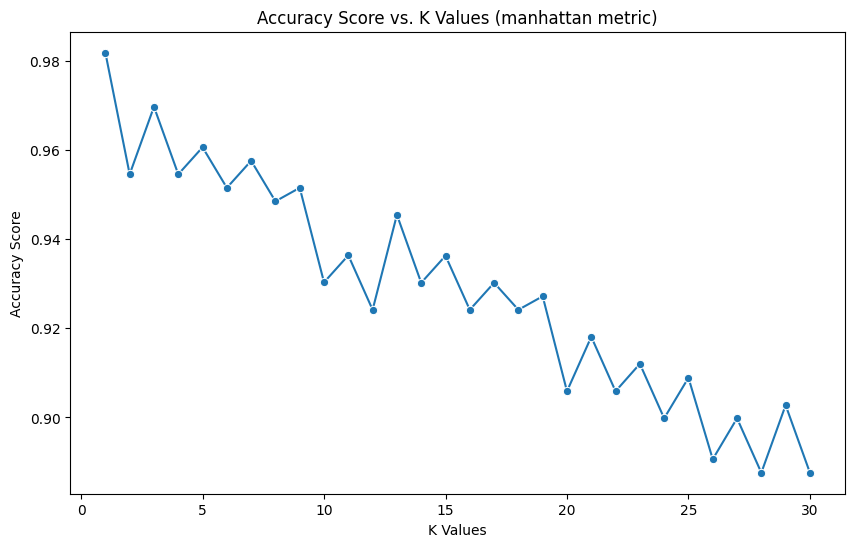

Dla metryki: manhattan najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9818181818181818


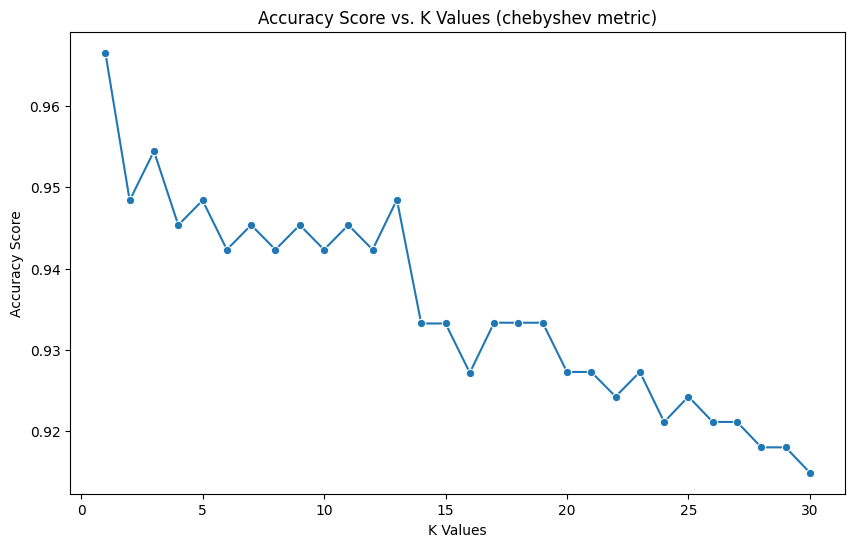

Dla metryki: chebyshev najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9665719696969697


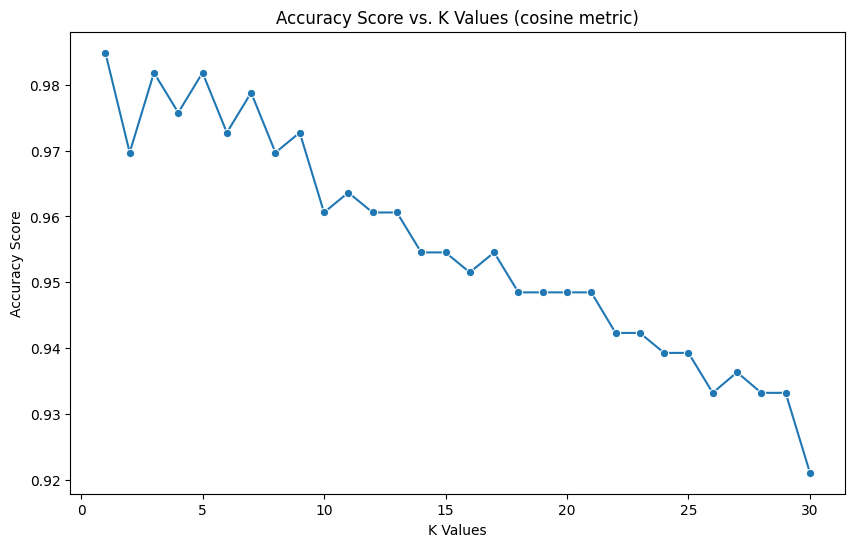

Dla metryki: cosine najlepsze K to: 1 dokladnosc wynosi dla niego: 0.9848484848484848


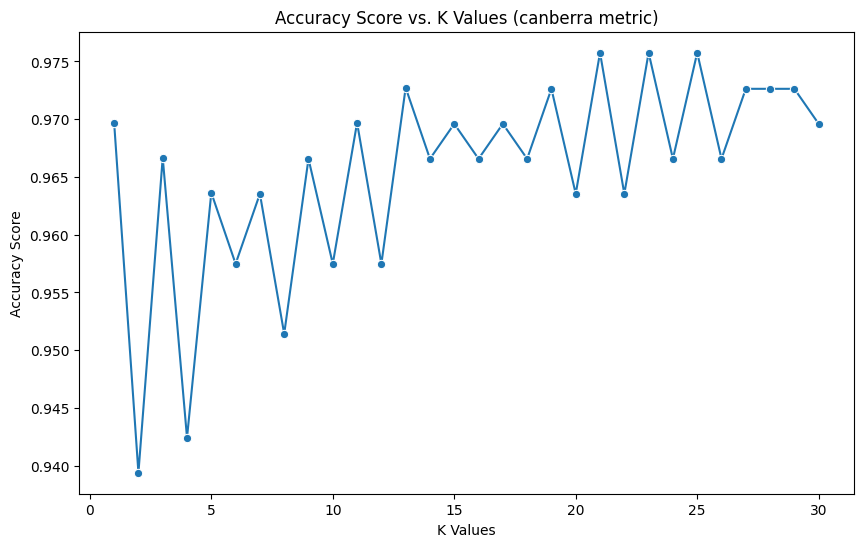

Dla metryki: canberra najlepsze K to: 21 dokladnosc wynosi dla niego: 0.9757575757575758


In [78]:
#Testy dla PCA18
all_data = []
# Użycie funkcji z metryką euklidesową
all_data.append(evaluate_knn_with_metric(X_PCA18, y, metric="euclidean"))
# Użycie funkcji z metryką Manhattan
all_data.append(evaluate_knn_with_metric(X_PCA18, y, metric="manhattan"))
# Użycie funkcji z metryką Czebyszewa
all_data.append(evaluate_knn_with_metric(X_PCA18, y, metric="chebyshev"))
# Użycie funkcji z metryką Cosinusową
all_data.append(evaluate_knn_with_metric(X_PCA18, y, metric="cosine"))
# Użycie funkcji z metryką Canberra
all_data.append(evaluate_knn_with_metric(X_PCA18, y, metric="canberra"))

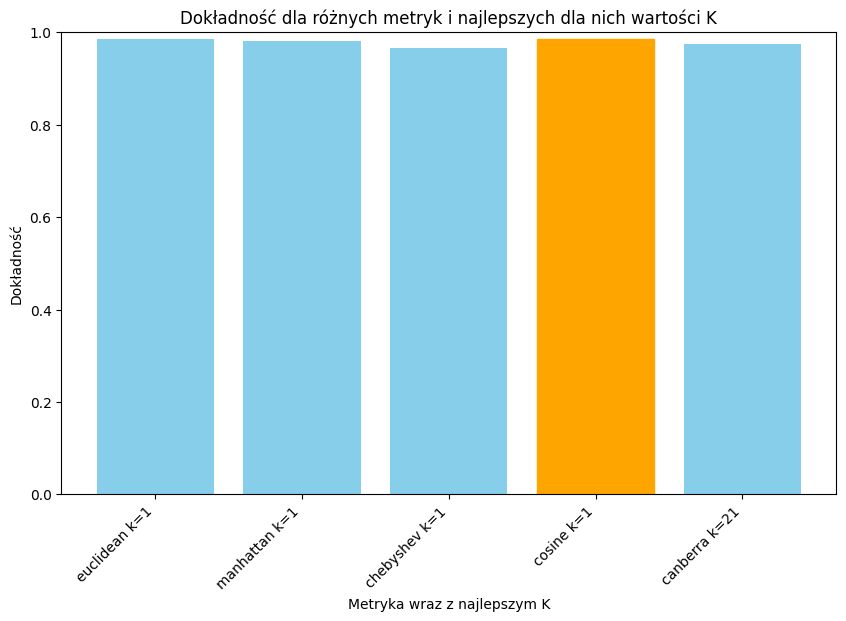

In [79]:
plot_accuracy(all_data)